<a href="https://colab.research.google.com/github/gauravkinhikar97/Credit-card-default-prediction-by-Gaurav-kinhikar/blob/main/credit_card_default_prediction_capstone_project_ipynb_by_Gaurav_kinhikar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
pd.set_option('max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

In [3]:
# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,roc_auc_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,cross_val_score

In [4]:
# For ignoring all the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df =pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls')

In [7]:
# It gives a list of all columns present in the datasets 
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
# shows the Preview of datasets uploads on collab enviornment
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# **Data preprocessing and cleaning**

In [9]:
# It removes labels on the Features
df.columns = df.iloc[0]
df.drop(labels= 0, axis = 0, inplace = True)

In [13]:
# It gives the Data types and information about null values of every features 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [10]:
# This will convert Dtypes object to int
df = df.astype('int')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# **Data Cleaning**

In [17]:
# It wiil give null values
df.isnull().sum()

0
LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
rePAY_1                       0
rePAY_2                       0
rePAY_3                       0
rePAY_4                       0
rePAY_5                       0
rePAY_6                       0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# **Since there are no null values so no null value treatment is required**

In [ ]:
# shows statistical summary of the dataframe
df.describe().T

,count,unique,top,freq
Unnamed: 0,30001,30001,ID,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


In [11]:
# It will drop the ID column
df.drop(['ID'],axis=1,inplace=True)

In [12]:
# It rename the SEX feature to GENDER for better understanding of datasets
df.rename(columns = {'SEX':'GENDER'}, inplace = True)

In [13]:
# It renames all the pay features to repay for better understanding of datasets
df.rename(columns = {'PAY_0':'rePAY_1','PAY_2':'rePAY_2','PAY_3':'rePAY_3','PAY_4':'rePAY_4','PAY_5':'rePAY_5','PAY_6':'rePAY_6'}, inplace = True)

In [14]:
# It shows after preprocessing data sets looks like 
df

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
# It shows list of features after preprocessing
df.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'rePAY_1',
       'rePAY_2', 'rePAY_3', 'rePAY_4', 'rePAY_5', 'rePAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [18]:
# It gives statistical summary of every features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
rePAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
rePAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
rePAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
rePAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [19]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

# It is showing that, The average value for the LIMIT BAL(amount of credit card) limit is 167,484 NT dollars.

# Education level is mostly graduate school (1) and university (2). 

# shows that Most of the clients are either marrined or single. 

# Average age is 35.5 years, with a standard deviation of 9.2 years.

# **Dealing with Outliers**

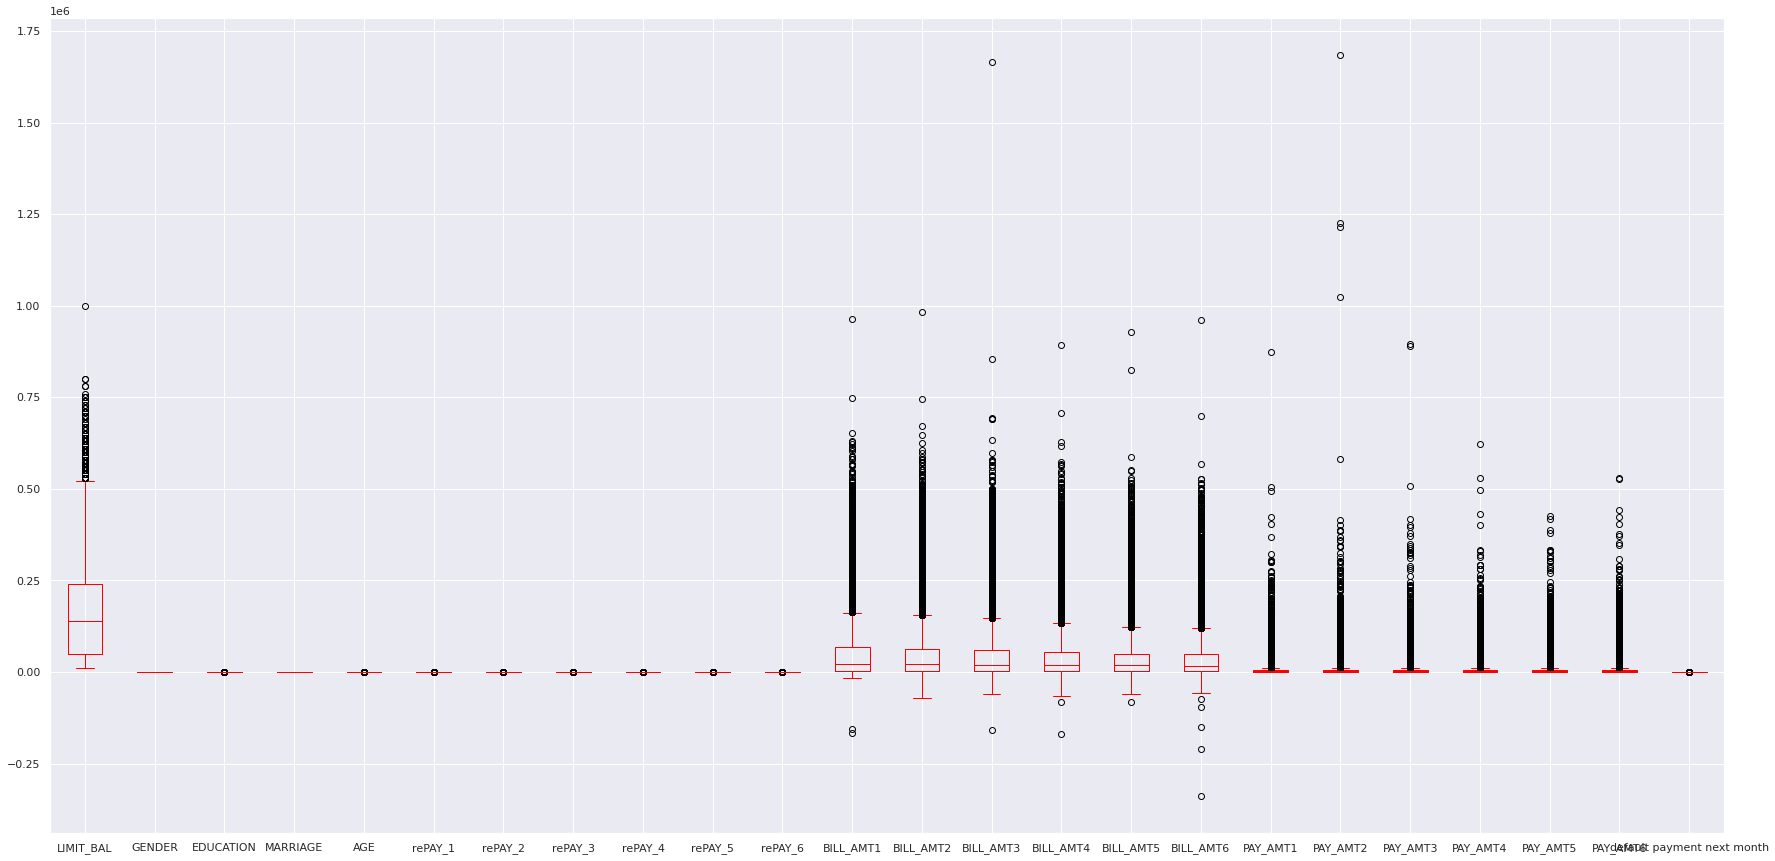

In [ ]:
plt.figure(figsize = (30, 15))  
df.boxplot(color = 'red' ) 

# Beacuse of the Financial datasets I do not prefer to do outliers treatments on every features so trying to do it on some features that not really affects  

In [15]:
# Treating BILL_AMT Features 
# I have seen that BILL_AMT features are in negative values so, I will remove it as a outlier
df = df[(df.BILL_AMT1 > 0) & (df.BILL_AMT2 > 0) & (df.BILL_AMT3 > 0) & (df.BILL_AMT4 > 0) & (df.BILL_AMT5 > 0)  & (df.BILL_AMT6 >  0)]

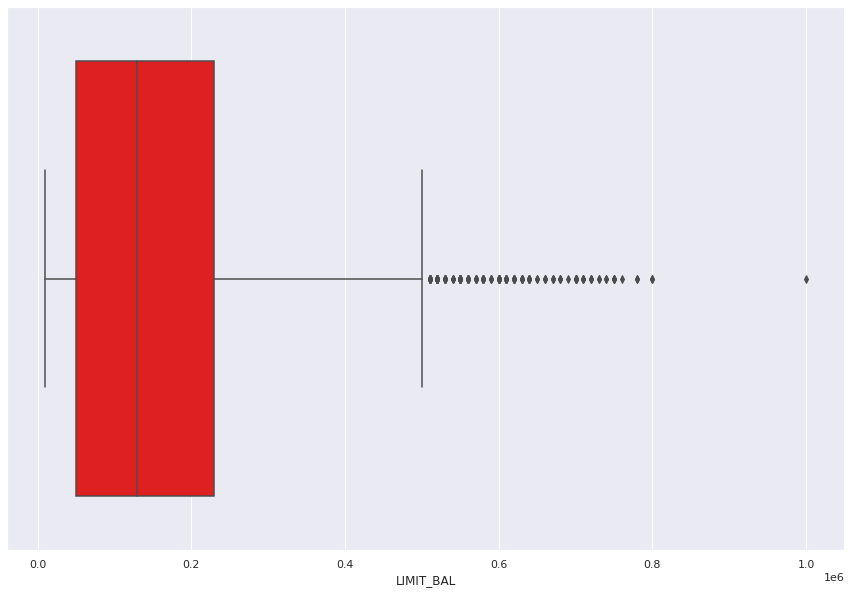

In [23]:
plt.figure(figsize = (15, 10)) 
sns.boxplot(df['LIMIT_BAL'],color = 'red' )

In [16]:
# removing outliers with the IQR (Inter Quantile Range)method
for p in ['LIMIT_BAL']:
    q75,q25 = np.percentile(df.loc[:,p],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[p] < min,p] = np.nan
    df.loc[df[p] > max,p] = np.nan

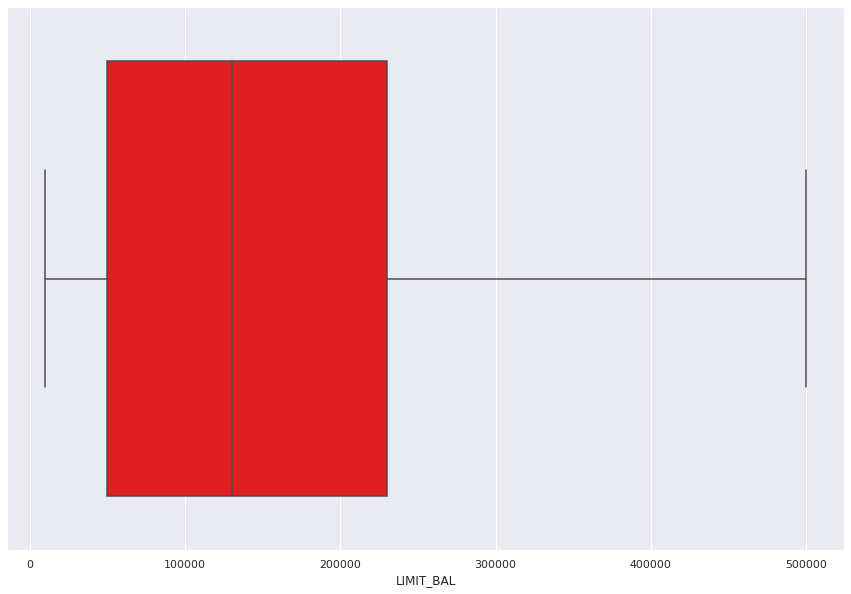

In [25]:
# This has removes the LIMIT BAL range after 550000 so as outliers
plt.figure(figsize = (15, 10)) 
sns.boxplot(df['LIMIT_BAL'],color = 'red' )

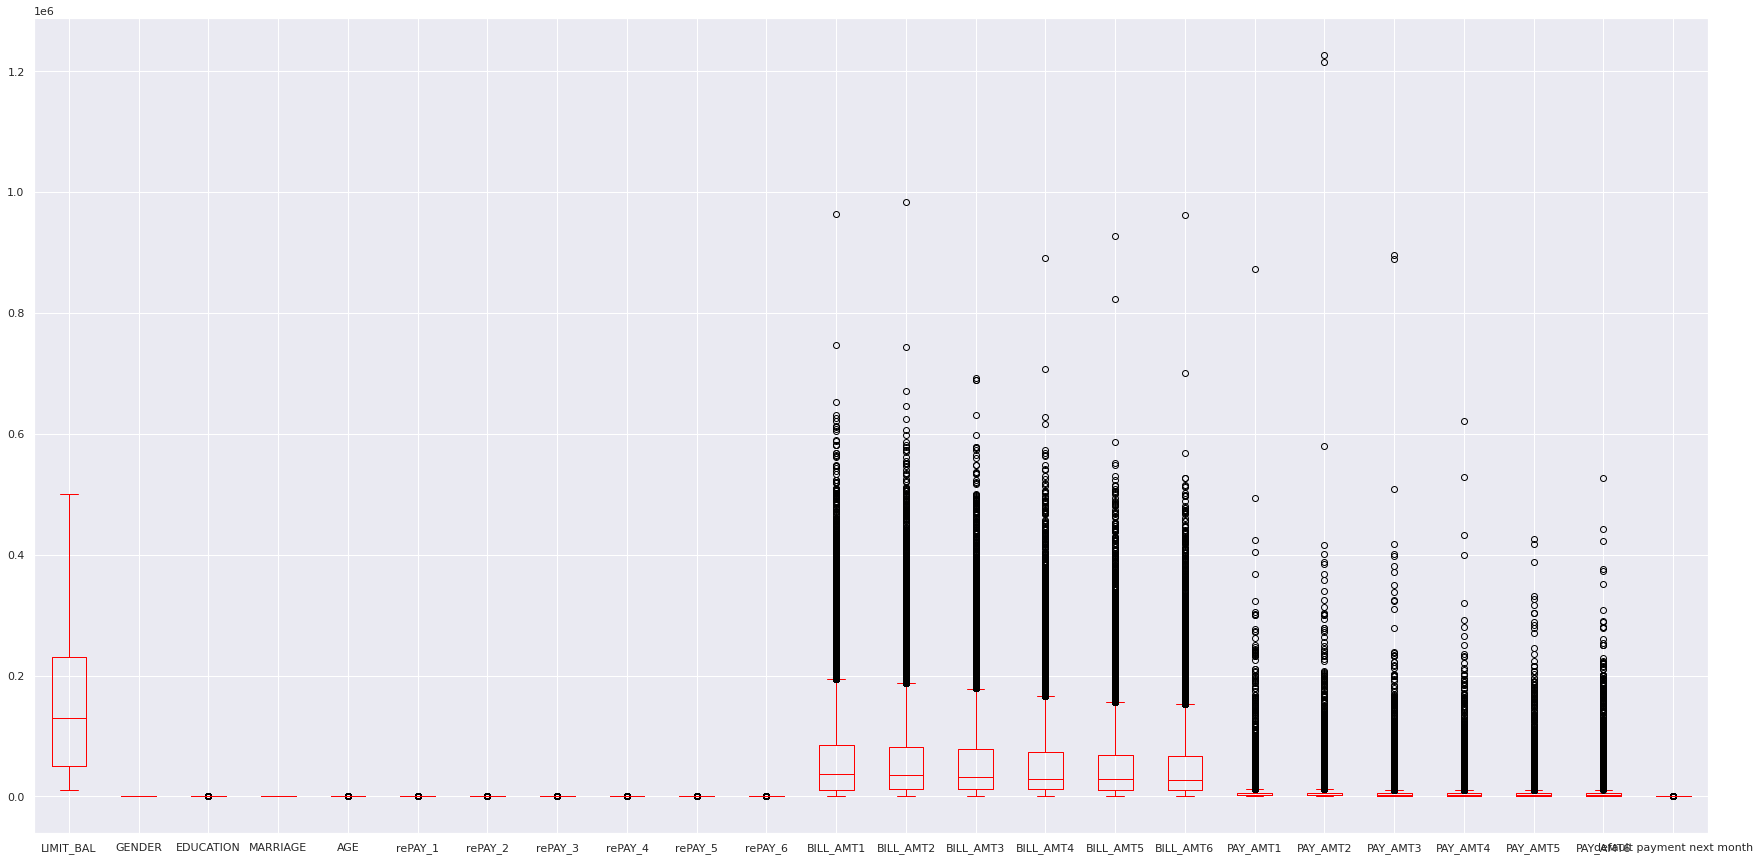

In [ ]:
plt.figure(figsize = (30, 15))  
df.boxplot(color = 'red' )

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22384 entries, 2 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   22205 non-null  float64
 1   GENDER                      22384 non-null  int64  
 2   EDUCATION                   22384 non-null  int64  
 3   MARRIAGE                    22384 non-null  int64  
 4   AGE                         22384 non-null  int64  
 5   rePAY_1                     22384 non-null  int64  
 6   rePAY_2                     22384 non-null  int64  
 7   rePAY_3                     22384 non-null  int64  
 8   rePAY_4                     22384 non-null  int64  
 9   rePAY_5                     22384 non-null  int64  
 10  rePAY_6                     22384 non-null  int64  
 11  BILL_AMT1                   22384 non-null  int64  
 12  BILL_AMT2                   22384 non-null  int64  
 13  BILL_AMT3                   223

In [27]:
df.isnull().sum()

0
LIMIT_BAL                     179
GENDER                          0
EDUCATION                       0
MARRIAGE                        0
AGE                             0
rePAY_1                         0
rePAY_2                         0
rePAY_3                         0
rePAY_4                         0
rePAY_5                         0
rePAY_6                         0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64

In [17]:
# Aftre doing outliers treatment on feature LIMIT BAL changed beacuse of null values present and also Dtypes 
# It will again convert to int and fill null values
df['LIMIT_BAL'].fillna(0, inplace =True)

df = df.astype({'LIMIT_BAL':'int'})

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22384 entries, 2 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   22384 non-null  int64
 1   GENDER                      22384 non-null  int64
 2   EDUCATION                   22384 non-null  int64
 3   MARRIAGE                    22384 non-null  int64
 4   AGE                         22384 non-null  int64
 5   rePAY_1                     22384 non-null  int64
 6   rePAY_2                     22384 non-null  int64
 7   rePAY_3                     22384 non-null  int64
 8   rePAY_4                     22384 non-null  int64
 9   rePAY_5                     22384 non-null  int64
 10  rePAY_6                     22384 non-null  int64
 11  BILL_AMT1                   22384 non-null  int64
 12  BILL_AMT2                   22384 non-null  int64
 13  BILL_AMT3                   22384 non-null  int64
 14  BILL_A

# **visualizing features**

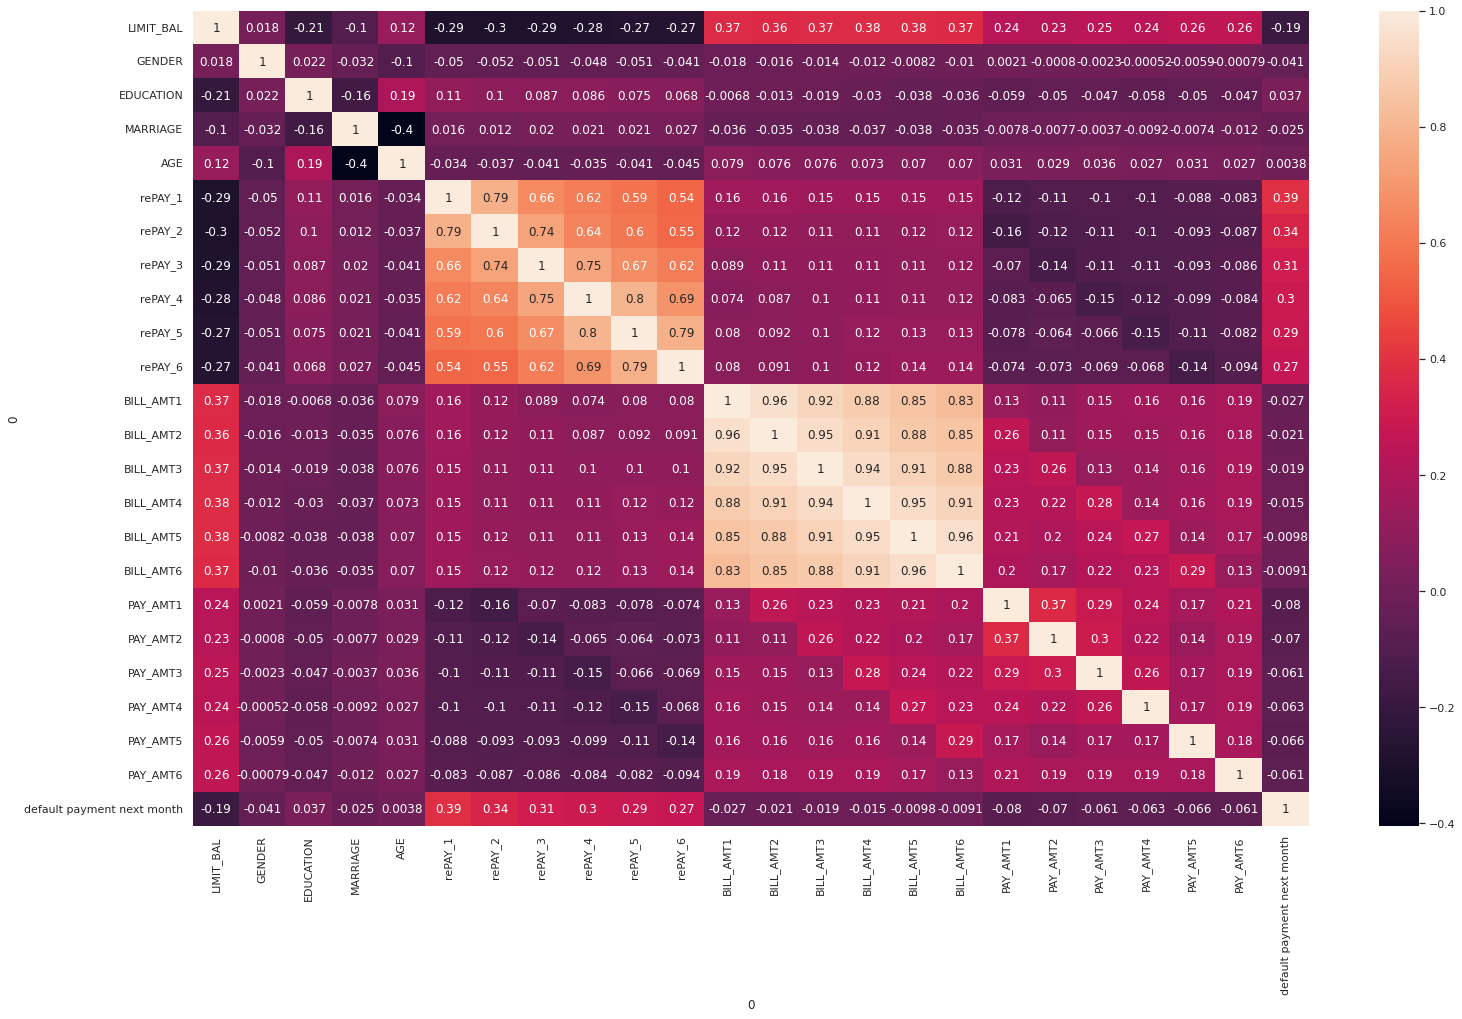

In [ ]:
# It creates Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

In [32]:
# via target variable lets found out its correlation with other feautures
cor = df.corr()
cor_target = abs(cor["default payment next month"])
cor_target

0
LIMIT_BAL                     0.184547
GENDER                        0.041486
EDUCATION                     0.037134
MARRIAGE                      0.025066
AGE                           0.003813
rePAY_1                       0.390059
rePAY_2                       0.343525
rePAY_3                       0.311547
rePAY_4                       0.296065
rePAY_5                       0.291698
rePAY_6                       0.274874
BILL_AMT1                     0.026771
BILL_AMT2                     0.021187
BILL_AMT3                     0.019179
BILL_AMT4                     0.015181
BILL_AMT5                     0.009791
BILL_AMT6                     0.009082
PAY_AMT1                      0.079882
PAY_AMT2                      0.070387
PAY_AMT3                      0.061301
PAY_AMT4                      0.062974
PAY_AMT5                      0.066311
PAY_AMT6                      0.061243
default payment next month    1.000000
Total_Bill                    0.018072
Total_Pay_AMT          

# **Feature Engineering**

# As I have seen that BILL_AMT features are positively correlated with each other and also PAY_AMT features are positively correlated with each other so, for treating multicollinearity  

In [18]:
# It adds all the BILL_AMT features in a single features
df['Total_Bill'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6']

In [19]:
# It adds all the Total_Pay_AMT features in a single features
df['Total_Pay_AMT'] = df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']

# **Data Exploration**

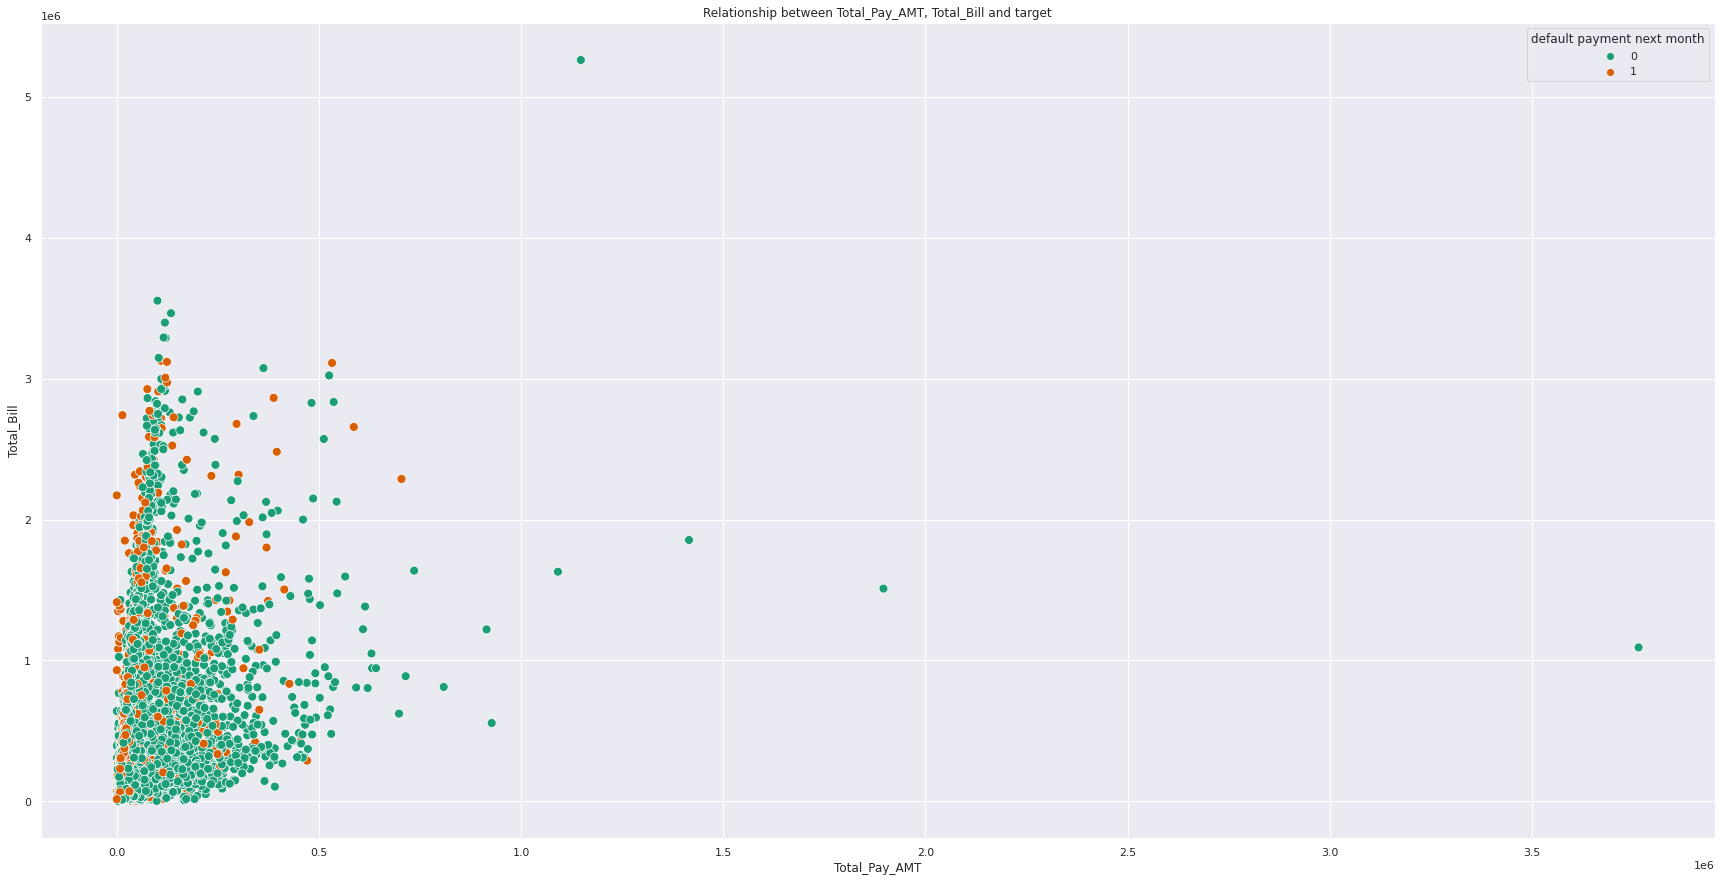

In [ ]:
# Checking relation between two features
plt.figure(figsize=(30,15))
sns.scatterplot(x="Total_Pay_AMT", y="Total_Bill", hue="default payment next month", data=df, palette="Dark2", s=80)
plt.title("Relationship between Total_Pay_AMT, Total_Bill and target")
plt.show()

# **Defaulters vs Non Defaulters**

Text(0.5, 1.0, 'Defaulters vs Not Defaulters')

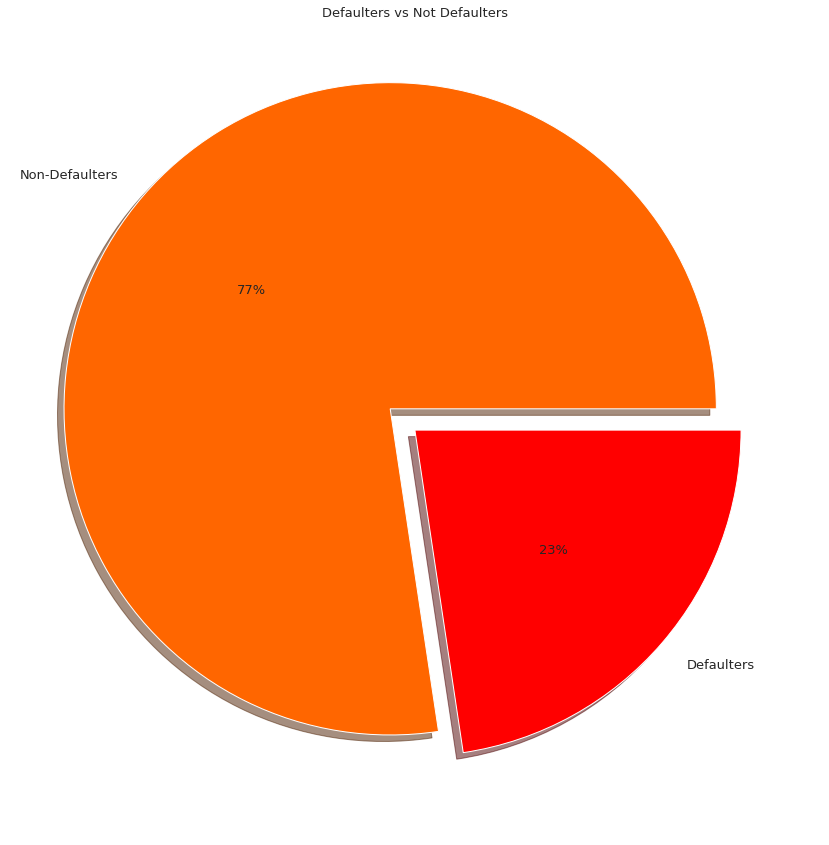

In [ ]:
# Creating a pie chart
plt.figure(figsize = (25,15))
plt.pie(df['default payment next month'].value_counts(),radius=1, autopct='%2.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['Non-Defaulters','Defaulters'],explode = [0.1, 0],
        shadow=True,colors=['#FF6600','#FF0000'])
plt.title('Defaulters vs Not Defaulters',fontdict={'size':13})

# **We can see that there are almost 77% of Non Defaulters and 23% are Only Defaulters**

# **Check LIMIT_BAL**

Text(0.5, 1.0, 'LIMIT BALANCE HISTOGRAM')

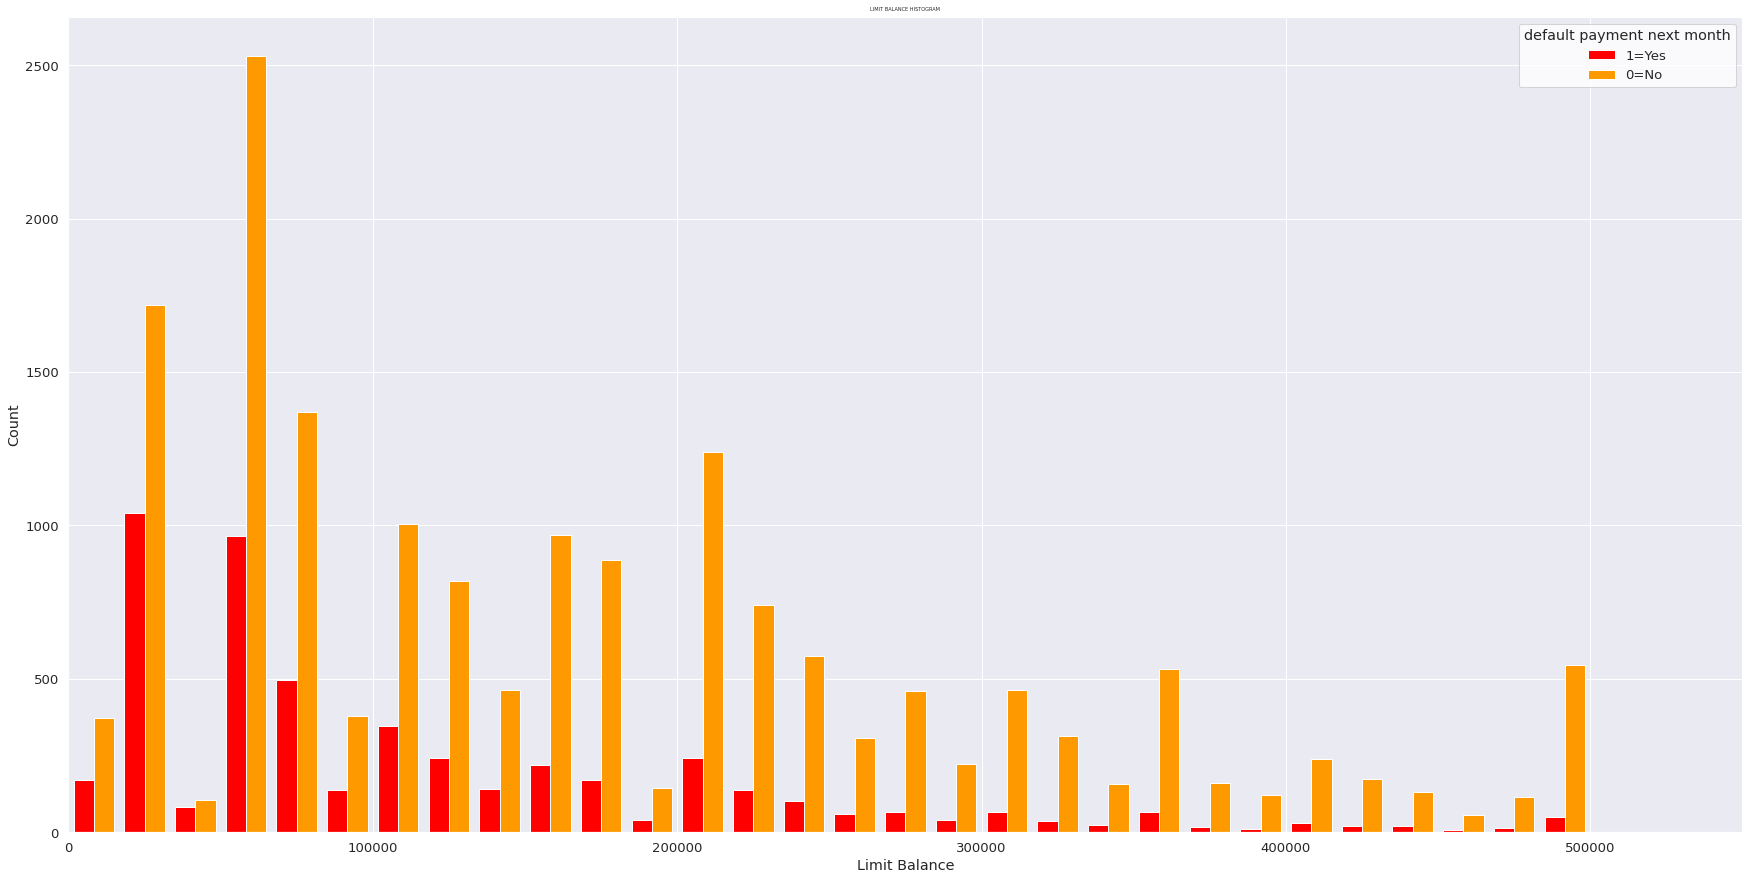

In [33]:
# LIMIT_BAL wise defaulters
Defaulters = list(df[df['default payment next month'] == 1]['LIMIT_BAL'])
Non_Defaulters = list(df[df['default payment next month'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(30,15))
sns.set_context('notebook', font_scale=1.2)
plt.hist([Defaulters, Non_Defaulters], bins = 30, color=['#FF0000','#FF9900'])
plt.xlim([0,550000]) #set balance limit
plt.legend(['1=Yes', '0=No'], title = 'default payment next month', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.title('LIMIT BALANCE HISTOGRAM', SIZE=5)

# As the LIMIT_BAL increases defaulters are decreases

# **Checking rePayments status**

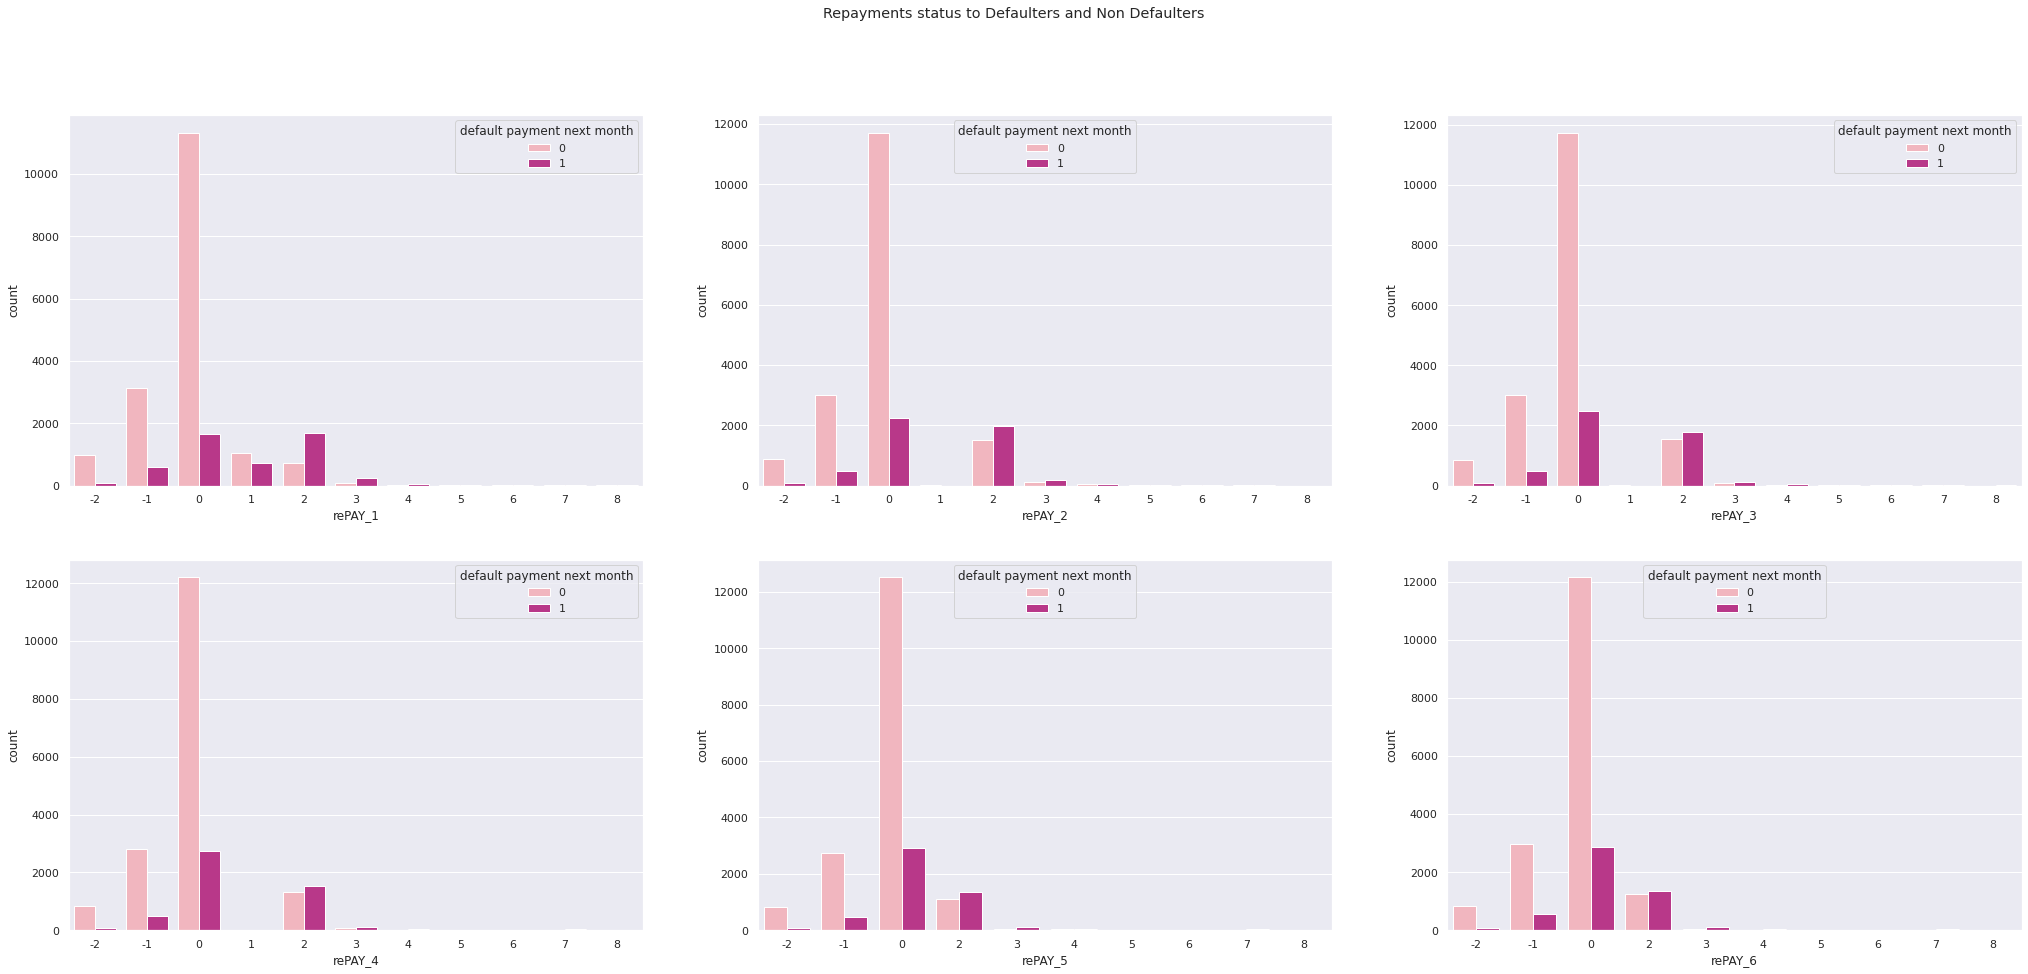

In [ ]:
# Creating a new dataframe for repayments status and compare with target variable
repay_df = df[['rePAY_1', 'rePAY_2', 'rePAY_3', 'rePAY_4', 
               'rePAY_5', 'rePAY_6','default payment next month']]

f, axes = plt.subplots(2, 3, figsize=(35, 15), facecolor='white')
f.suptitle('Repayments status to Defaulters and Non Defaulters')

fig_1 = sns.countplot(x="rePAY_1", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[0,0])
fig_2 = sns.countplot(x="rePAY_2", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[0,1])
fig_3 = sns.countplot(x="rePAY_3", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[0,2])
fig_4 = sns.countplot(x="rePAY_4", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[1,0])
fig_5 = sns.countplot(x="rePAY_5", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[1,1])
fig_6 = sns.countplot(x="rePAY_6", hue="default payment next month", data=repay_df, palette="RdPu", ax=axes[1,2]);

# It is showing that Clients which are going to be default for next month are dealying their payments consistently 
# Clinets which are not going to be default have done payments consistently for upto 6 months 

# **CHECK EDUCATION**

# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others).

In [ ]:
df.value_counts('EDUCATION')

EDUCATION
2    11013
1     7279
3     3793
5      190
4       70
6       31
0        8
dtype: int64

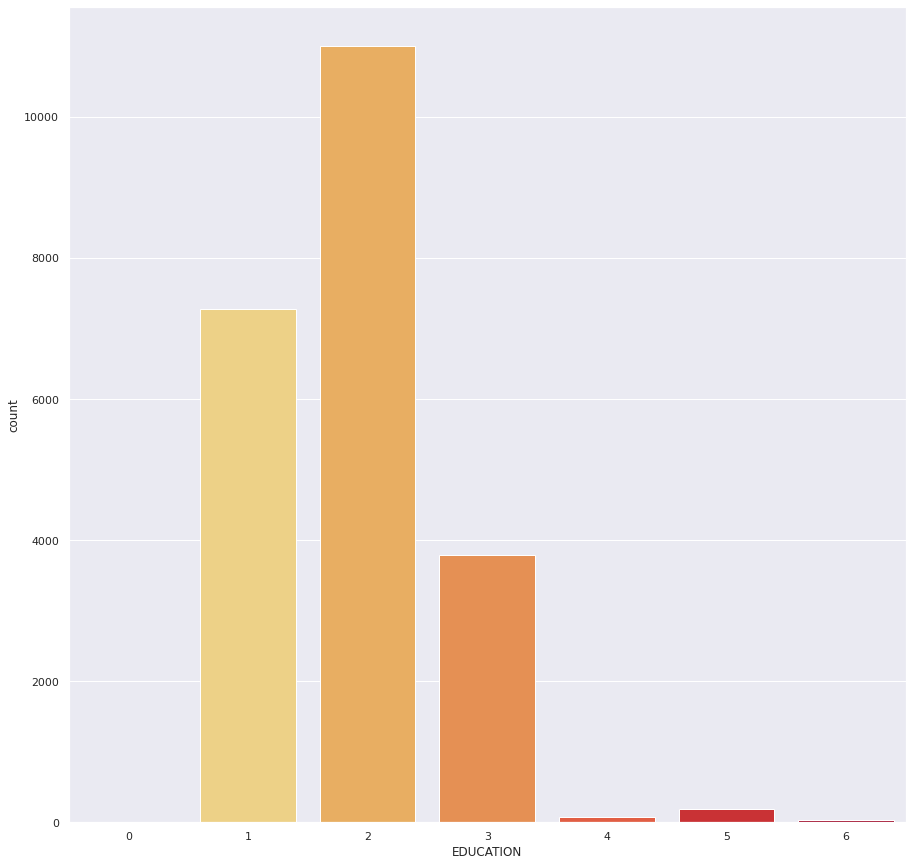

In [ ]:
sns.countplot('EDUCATION',data = df,palette="YlOrRd")
plt.rcParams['figure.figsize'] = (15, 15)

# In our Dataset there is in EDUCATION 0,5,6 refers to nothing so I have merge this in 4 refers to others 

In [20]:
Merge = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6) 
df.loc[Merge, 'EDUCATION'] = 4

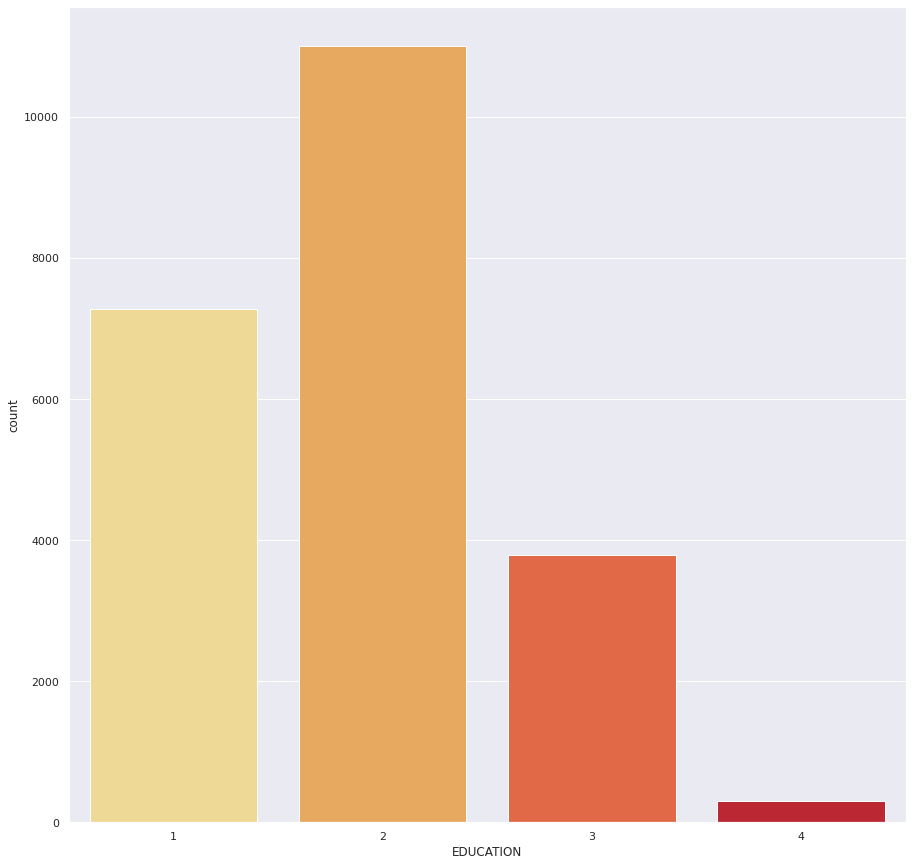

In [ ]:
sns.countplot('EDUCATION',data = df,palette="YlOrRd")
plt.rcParams['figure.figsize'] = (15, 15)

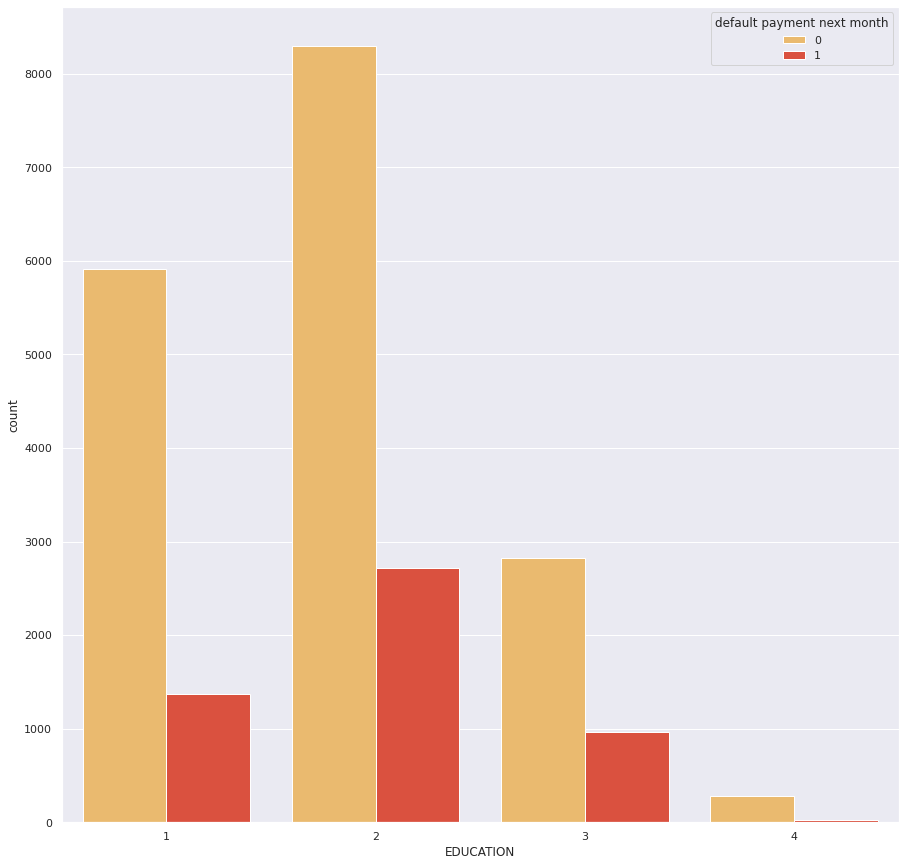

In [ ]:
sns.countplot(x=df['EDUCATION'],hue=df['default payment next month'],palette="YlOrRd")
plt.rcParams['figure.figsize'] = (25,10)

# I have seen university students had most of the entries in the dataset
# Also most of the university students are also going to be Defaults 

Text(0.5, 0, 'EDUCATION WISE LIMIT BALANCE')

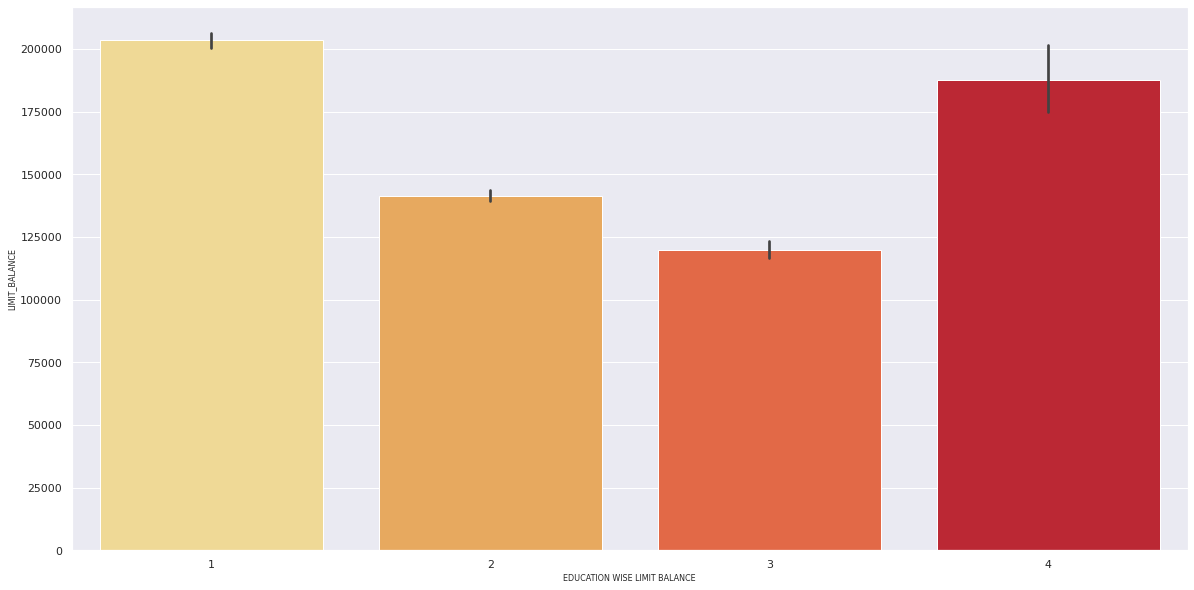

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['EDUCATION'],df['LIMIT_BAL'],palette ='YlOrRd')
plt.ylabel('LIMIT_BALANCE',fontdict={'fontsize':8})
plt.xlabel('EDUCATION WISE LIMIT BALANCE',fontdict={'fontsize':8})

Text(0.5, 0, 'EDUCATION WISE LIMIT BALANCE')

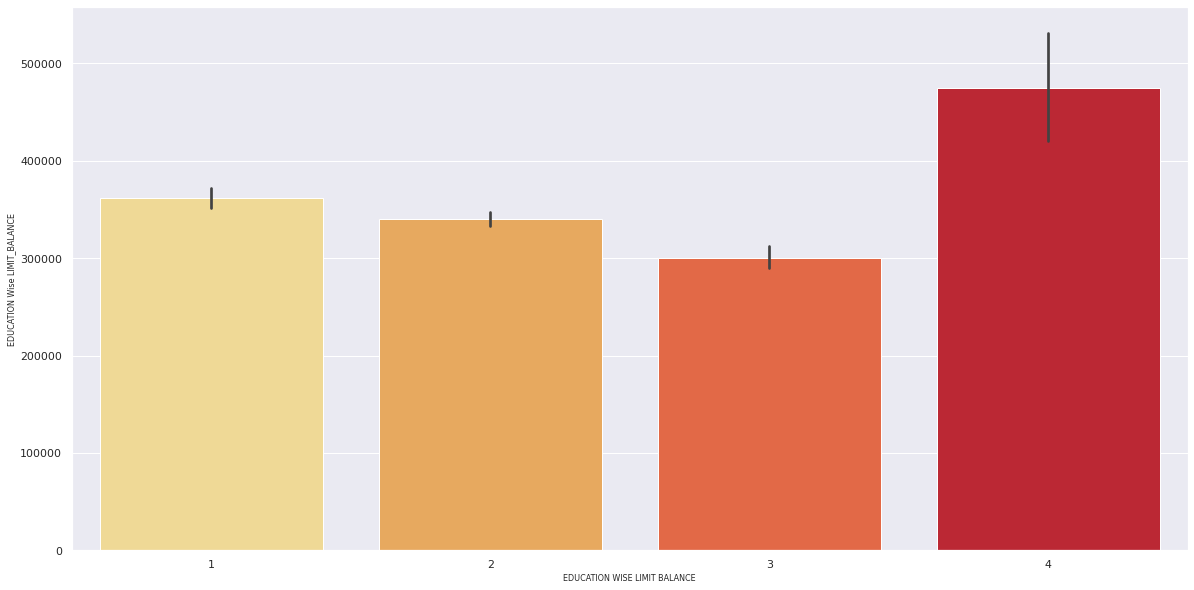

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(df['EDUCATION'],df['Total_Bill'],palette ='YlOrRd')
plt.ylabel('EDUCATION Wise LIMIT_BALANCE',fontdict={'fontsize':8})
plt.xlabel('EDUCATION WISE LIMIT BALANCE',fontdict={'fontsize':8})

# Peoples who are graduate had more LIMIT_BAL than others and also thier Total_BILL is also showing more than university and high schools students

# MARRIAGE 

In [ ]:
df.value_counts('MARRIAGE')

MARRIAGE
2    12013
1    10085
3      251
0       35
dtype: int64

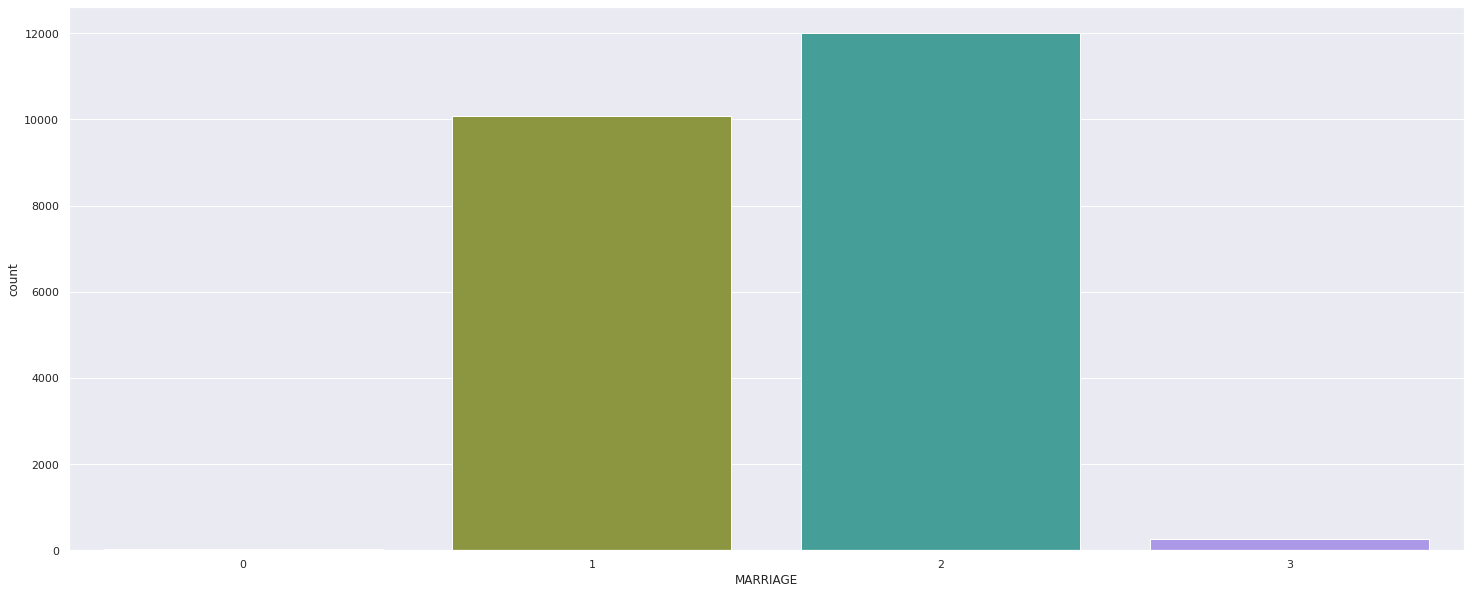

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(df['MARRIAGE'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()

# Marital status (1 = married; 2 = single; 3 = others) There is not mention 0 refers to so i have merge 0 in the 3 refers to others which are may be Divorced

In [21]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    12013
1    10085
3      286
Name: MARRIAGE, dtype: int64

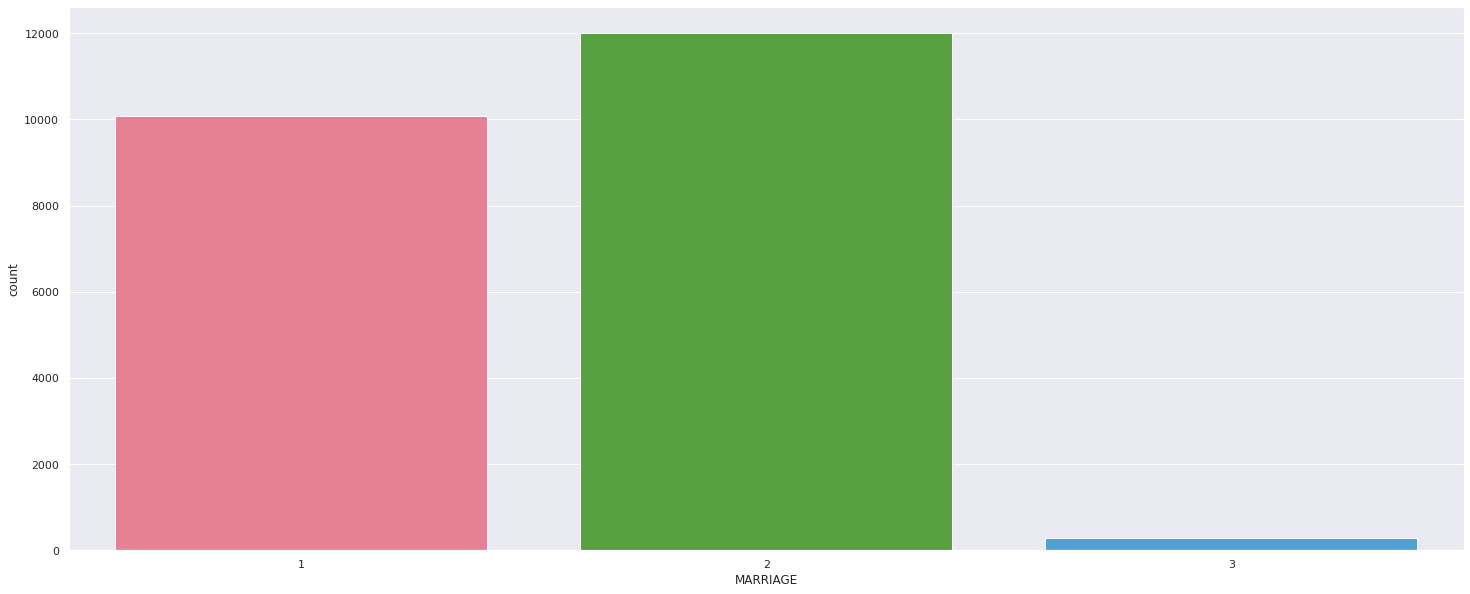

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(df['MARRIAGE'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()

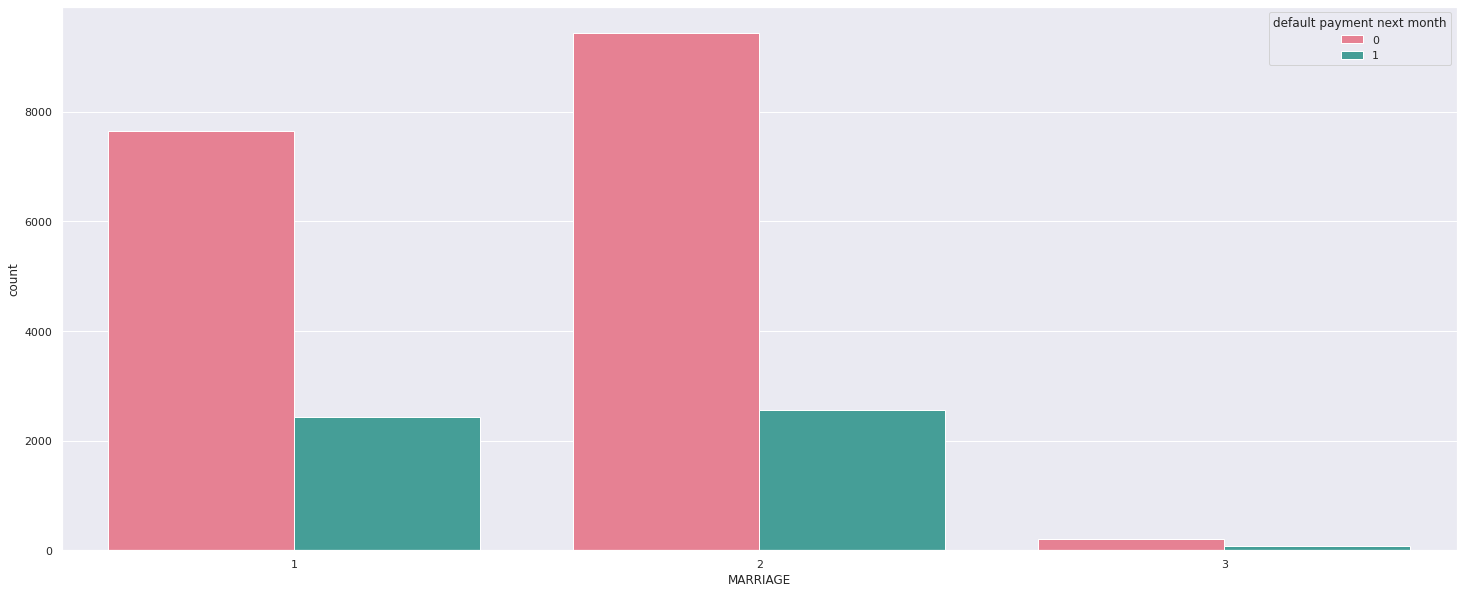

In [ ]:
sns.countplot(x=df['MARRIAGE'],hue=df['default payment next month'], palette='husl')
plt.rcParams['figure.figsize'] = (18, 5)

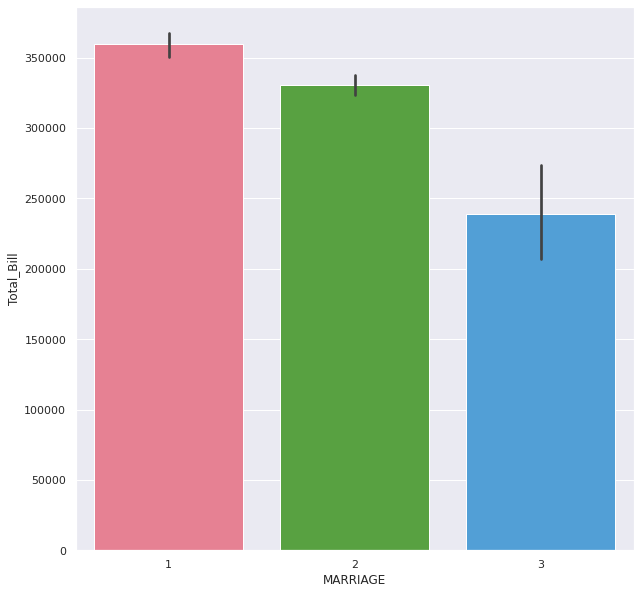

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(df['MARRIAGE'],df['Total_Bill'],palette='husl')
plt.show()

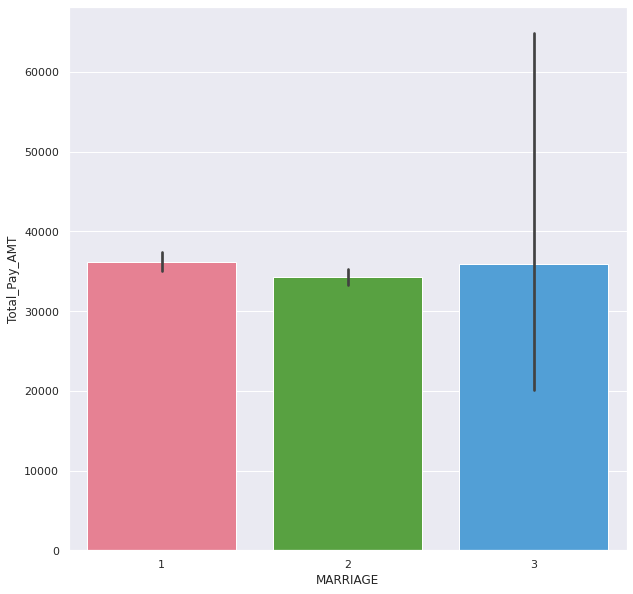

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(df['MARRIAGE'],df['Total_Pay_AMT'],palette='husl')
plt.show()

# Most of the credit card users in the Dataset are singles 
# Married and sigles Both are to going to be default but mostly singles 
# And also I can say that married people had generated more bills than singles and others and also as compared to single peoples that married peoples had done more pay_AMT.


# LETS CHECK GENDER

In [ ]:
df.value_counts('GENDER')

GENDER
2    13338
1     9046
dtype: int64

Text(0.5, 1.0, 'GENDER PERCENTAGE')

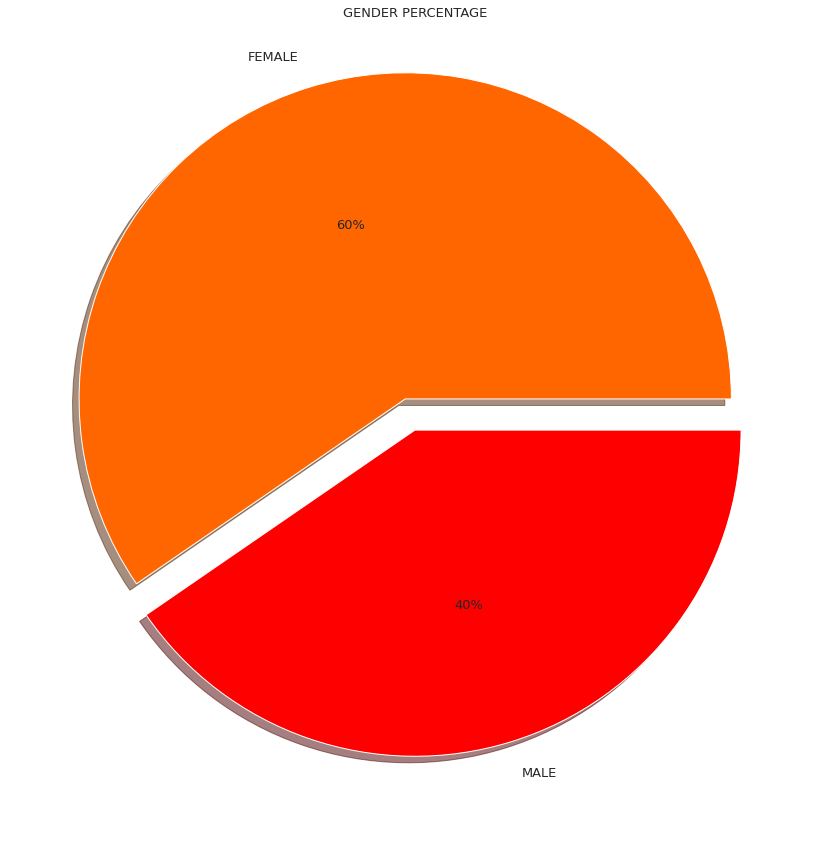

In [ ]:
# Creating a pie chart for GENDER
plt.figure(figsize = (25,15))
plt.pie(df['GENDER'].value_counts(),radius=1, autopct='%2.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['FEMALE','MALE'],explode = [0.1, 0],
        shadow=True,colors=['#FF6600','#FF0000'])
plt.title('GENDER PERCENTAGE',fontdict={'size':13})

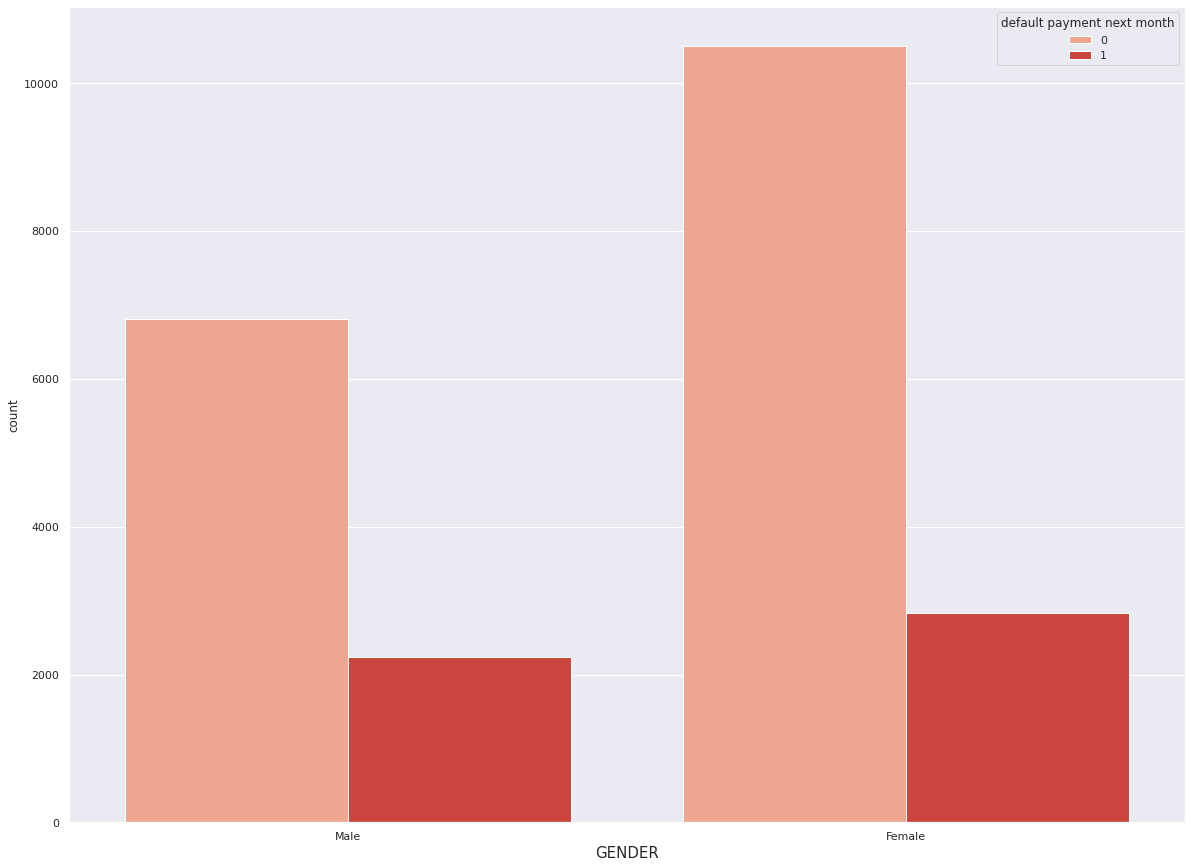

In [ ]:
# It shows gender wise default payments
sns.countplot(x=df['GENDER'],hue=df['default payment next month'],palette ='Reds')
plt.xticks(ticks=range(2),labels=['Male','Female'])
plt.xlabel('GENDER',fontdict={'size':15})
plt.rcParams['figure.figsize'] = (20, 15)

Text(0.5, 0, 'GENDER')

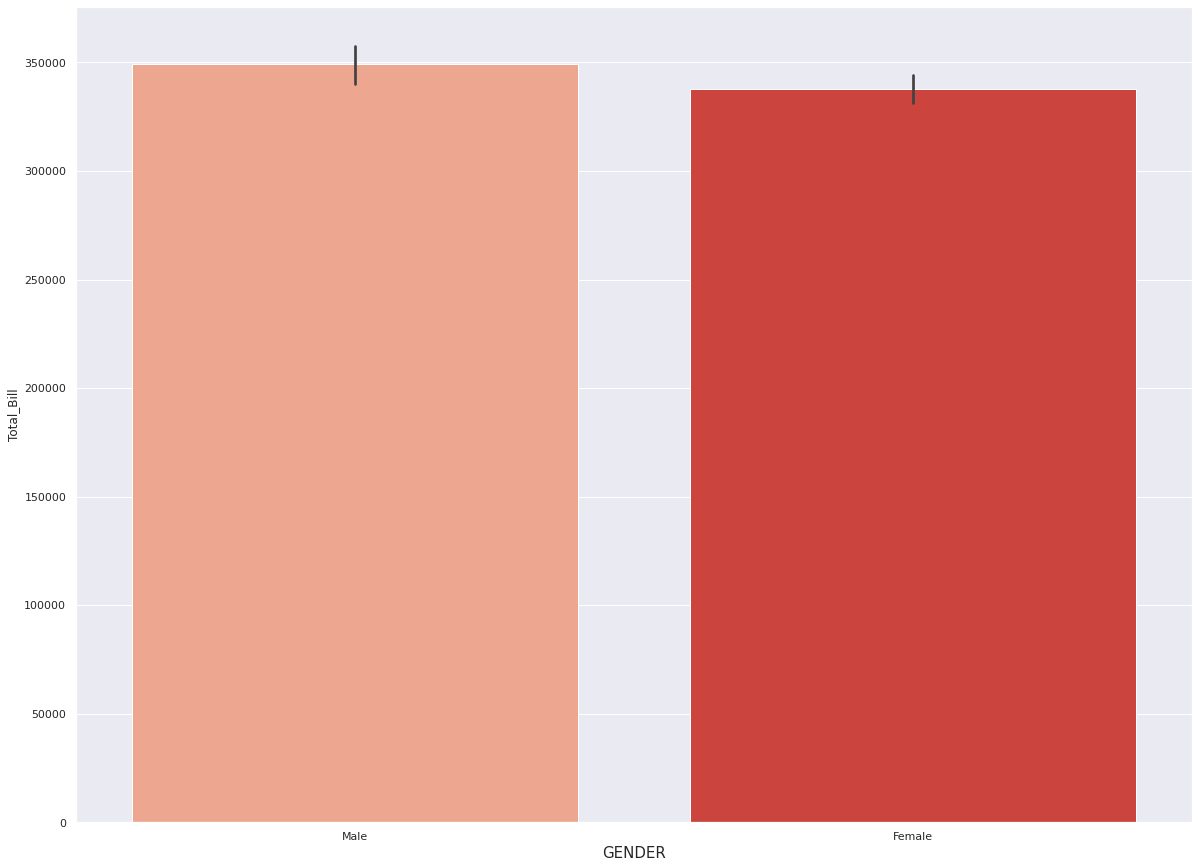

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(df['GENDER'],df['Total_Bill'],palette='Reds')
plt.xticks(ticks=range(2),labels=['Male','Female'])
plt.xlabel('GENDER',fontdict={'size':15})

Text(0.5, 0, 'GENDER')

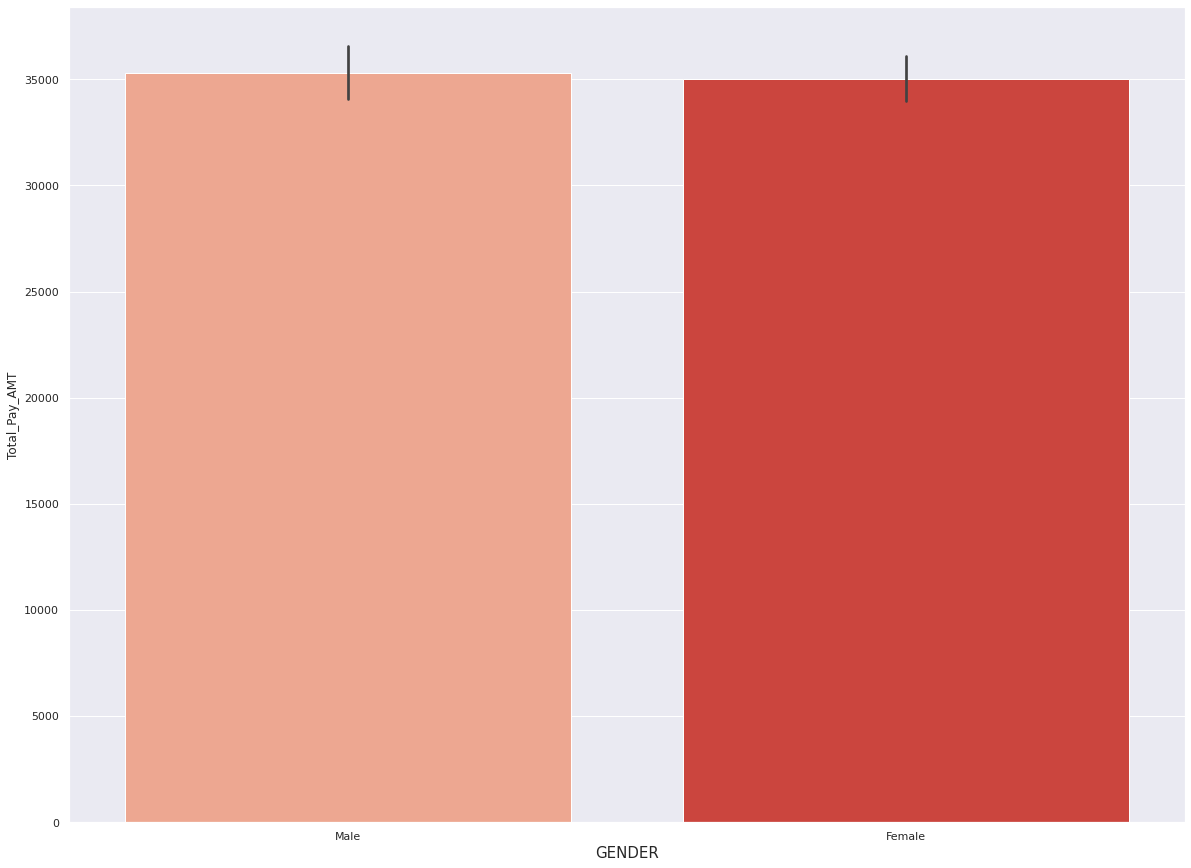

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(df['GENDER'],df['Total_Pay_AMT'],palette='Reds')
plt.xticks(ticks=range(2),labels=['Male','Female'])
plt.xlabel('GENDER',fontdict={'size':15})

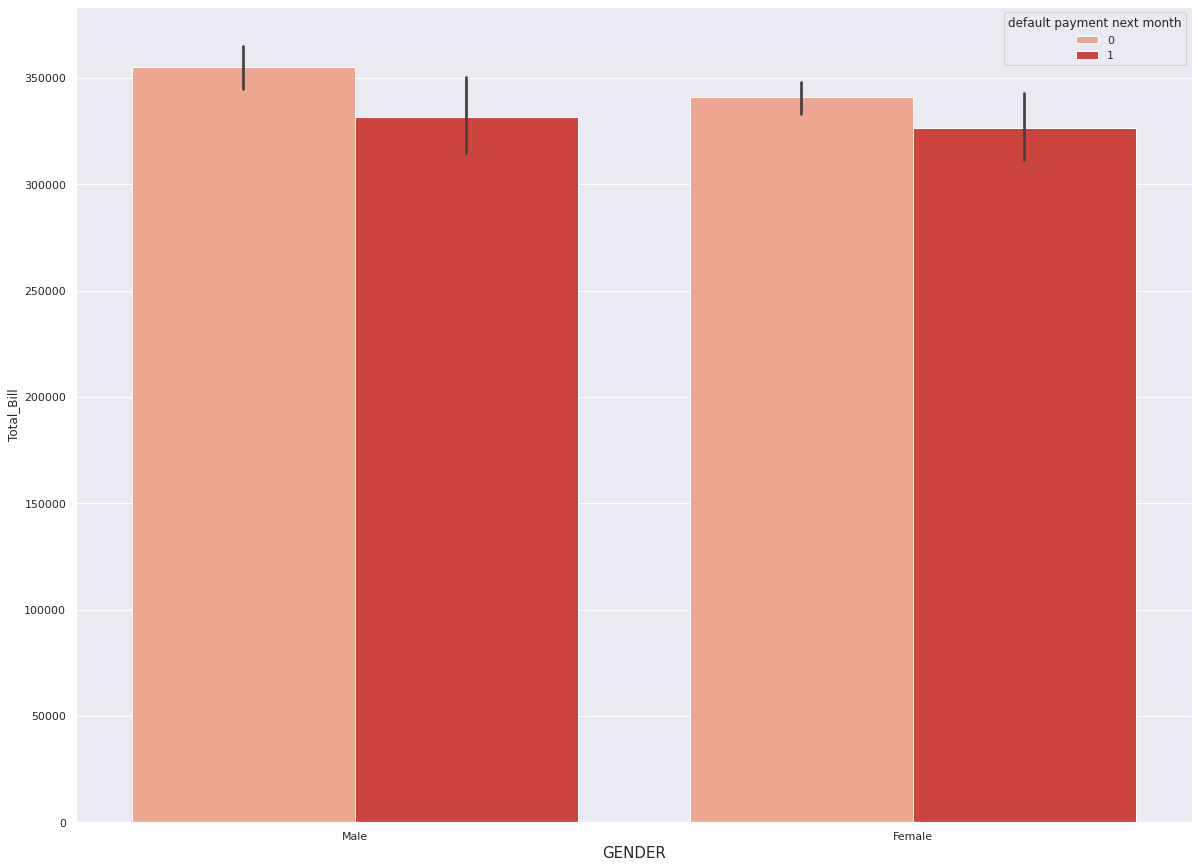

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(df["GENDER"],df["Total_Bill"],df["default payment next month"],palette='Reds')
plt.xticks(ticks=range(2),labels=['Male','Female'])
plt.xlabel('GENDER',fontdict={'size':15})
plt.show()

# The Number of females are much more than males in the dataset
# Also mostly females are going to be default next month but if we see males are also going to be default as near as females although having less credit card users
# Males have generated more bill than females 
# Also i can see that Males and Females which are non defaulters had generated more bills than defaulters

# Check AGE

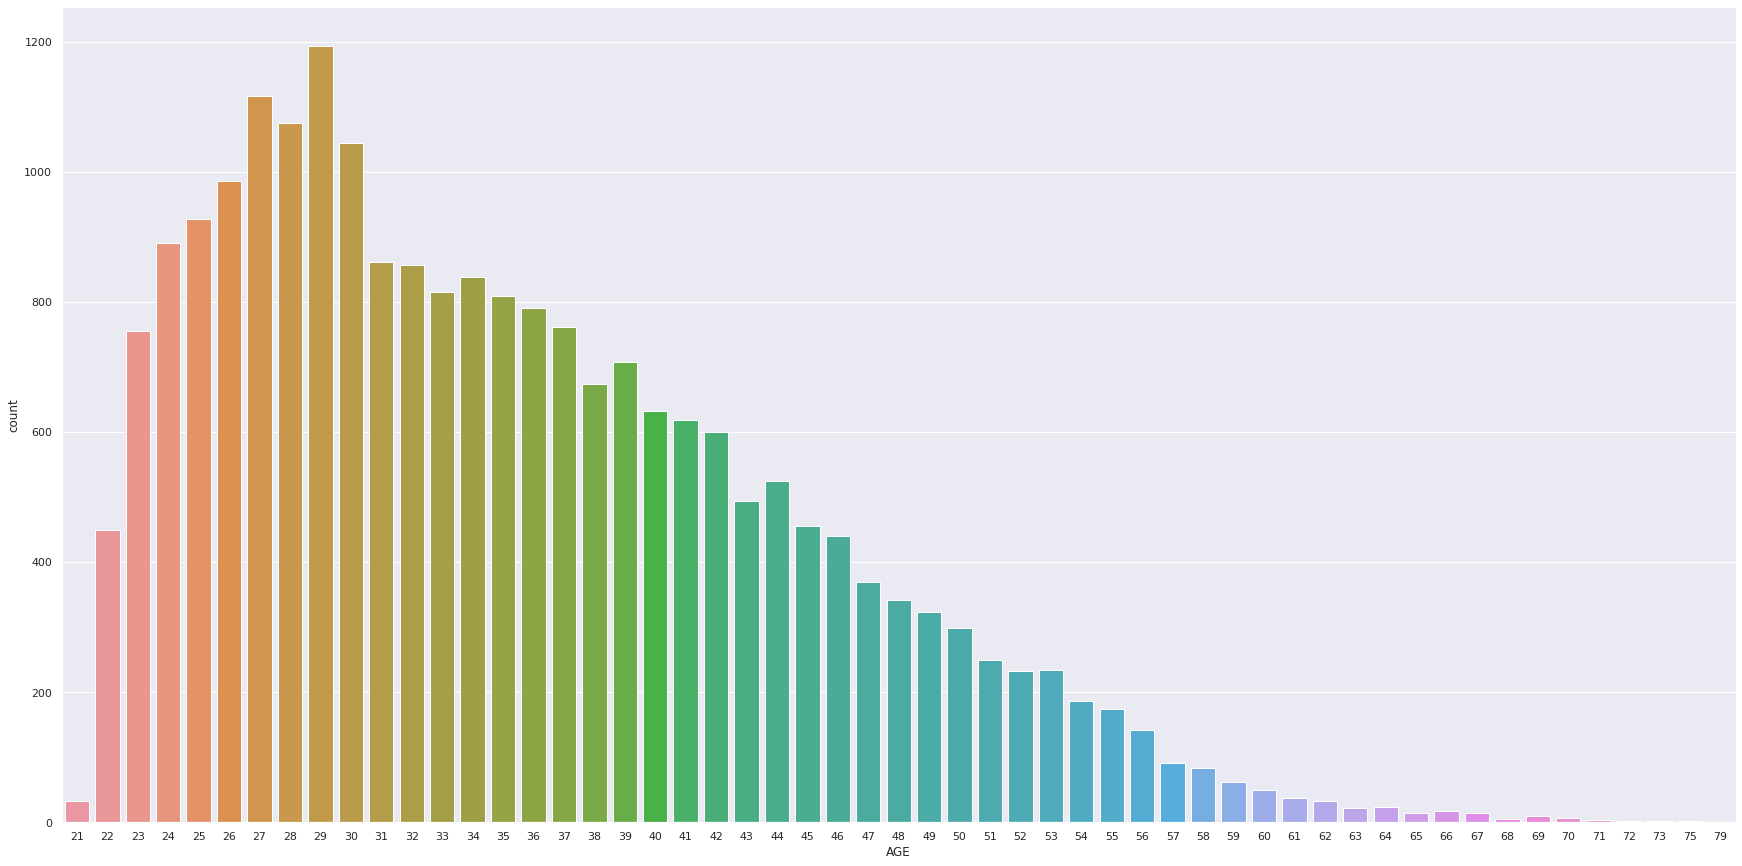

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(df.AGE)
plt.show()

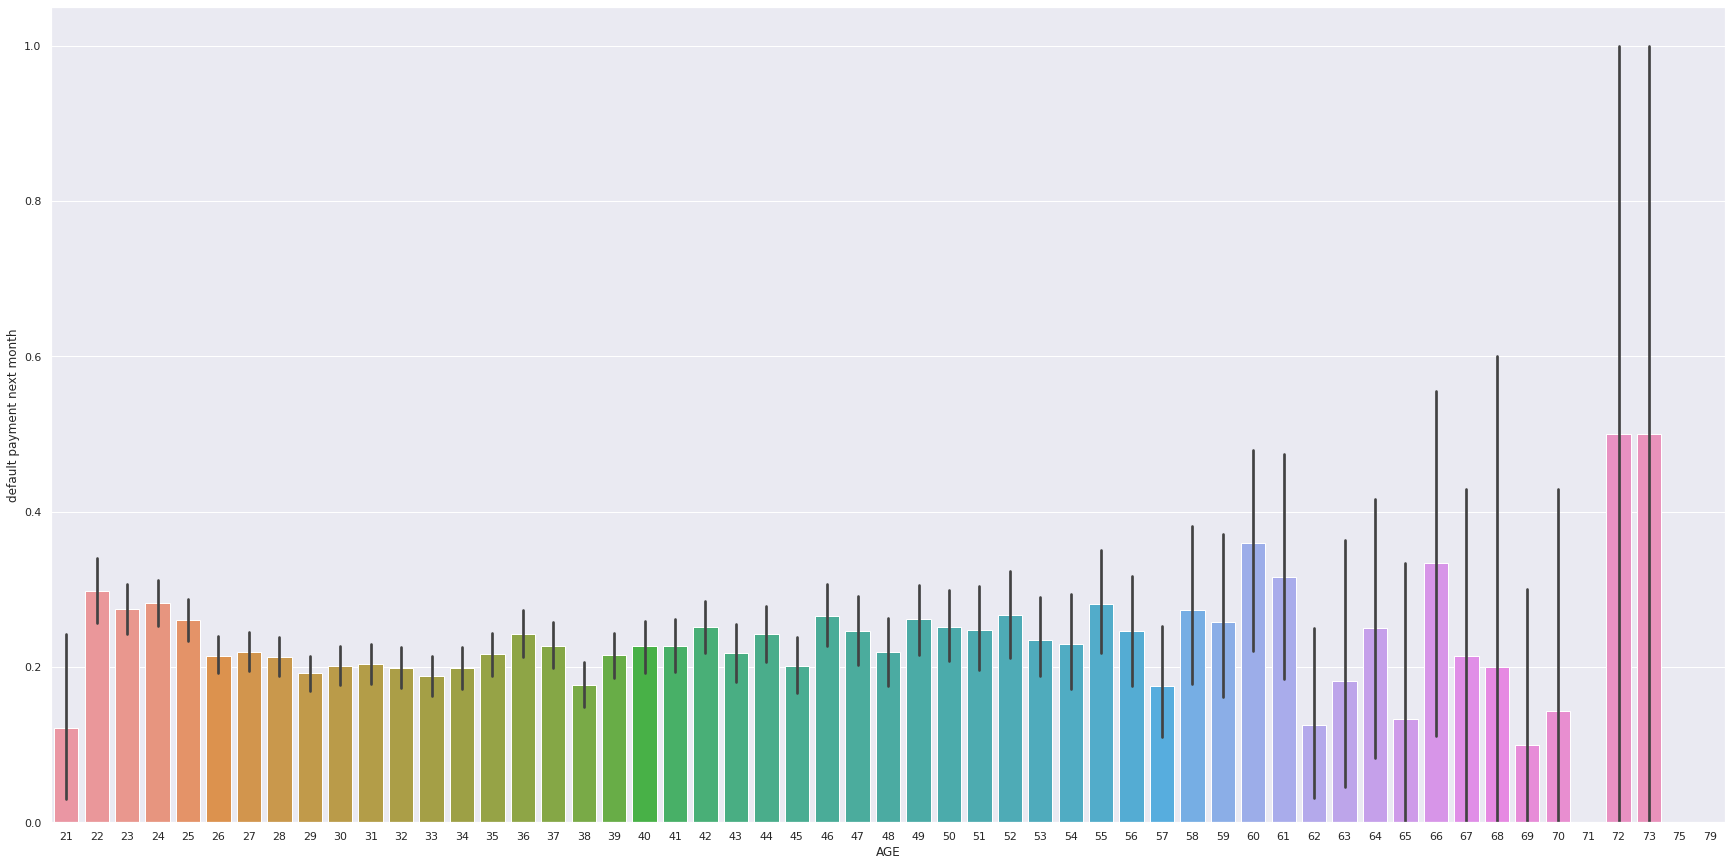

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(df['AGE'],df['default payment next month'])
plt.show()

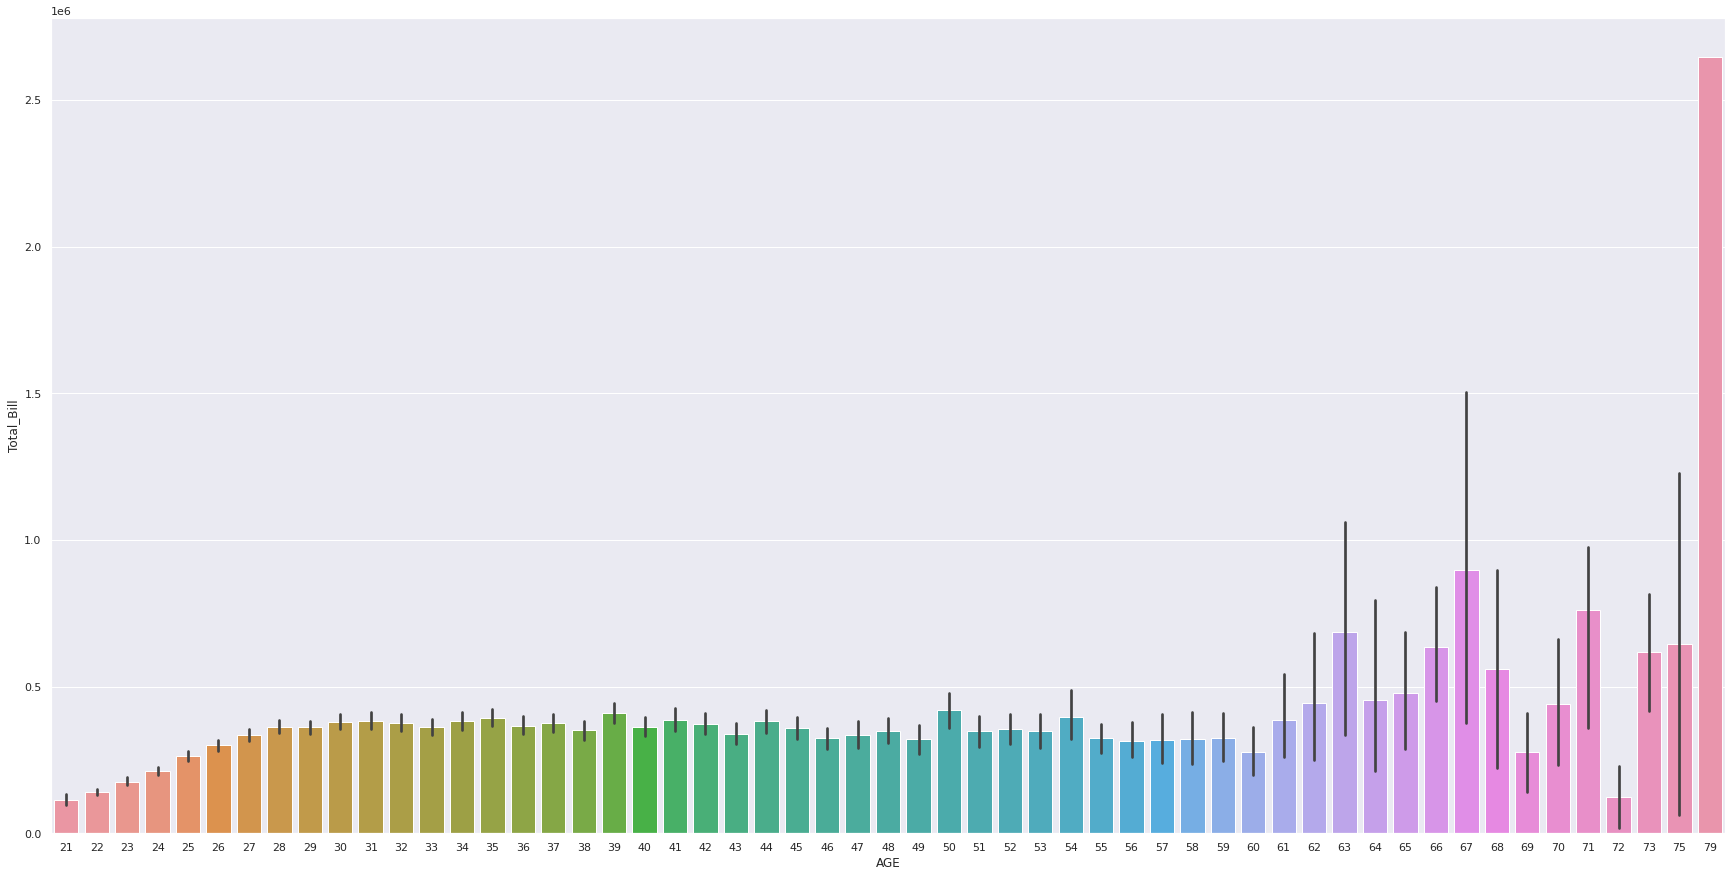

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(df['AGE'],df['Total_Bill'])
plt.show()

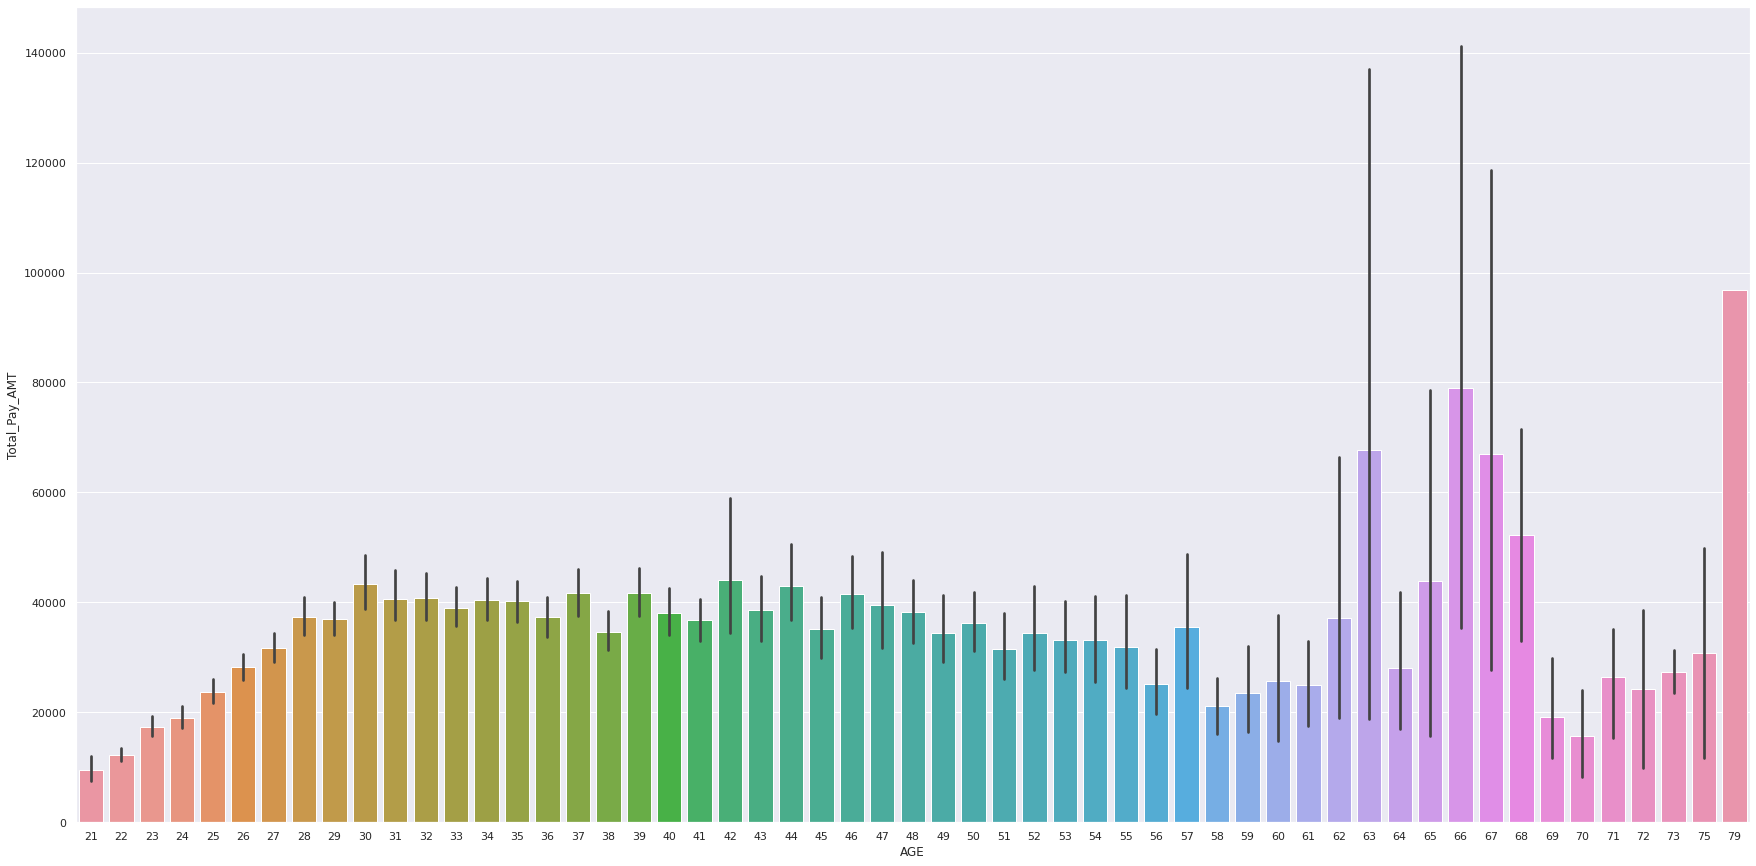

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(df['AGE'],df['Total_Pay_AMT'])
plt.show()

Text(0.5, 0, 'Age in years')

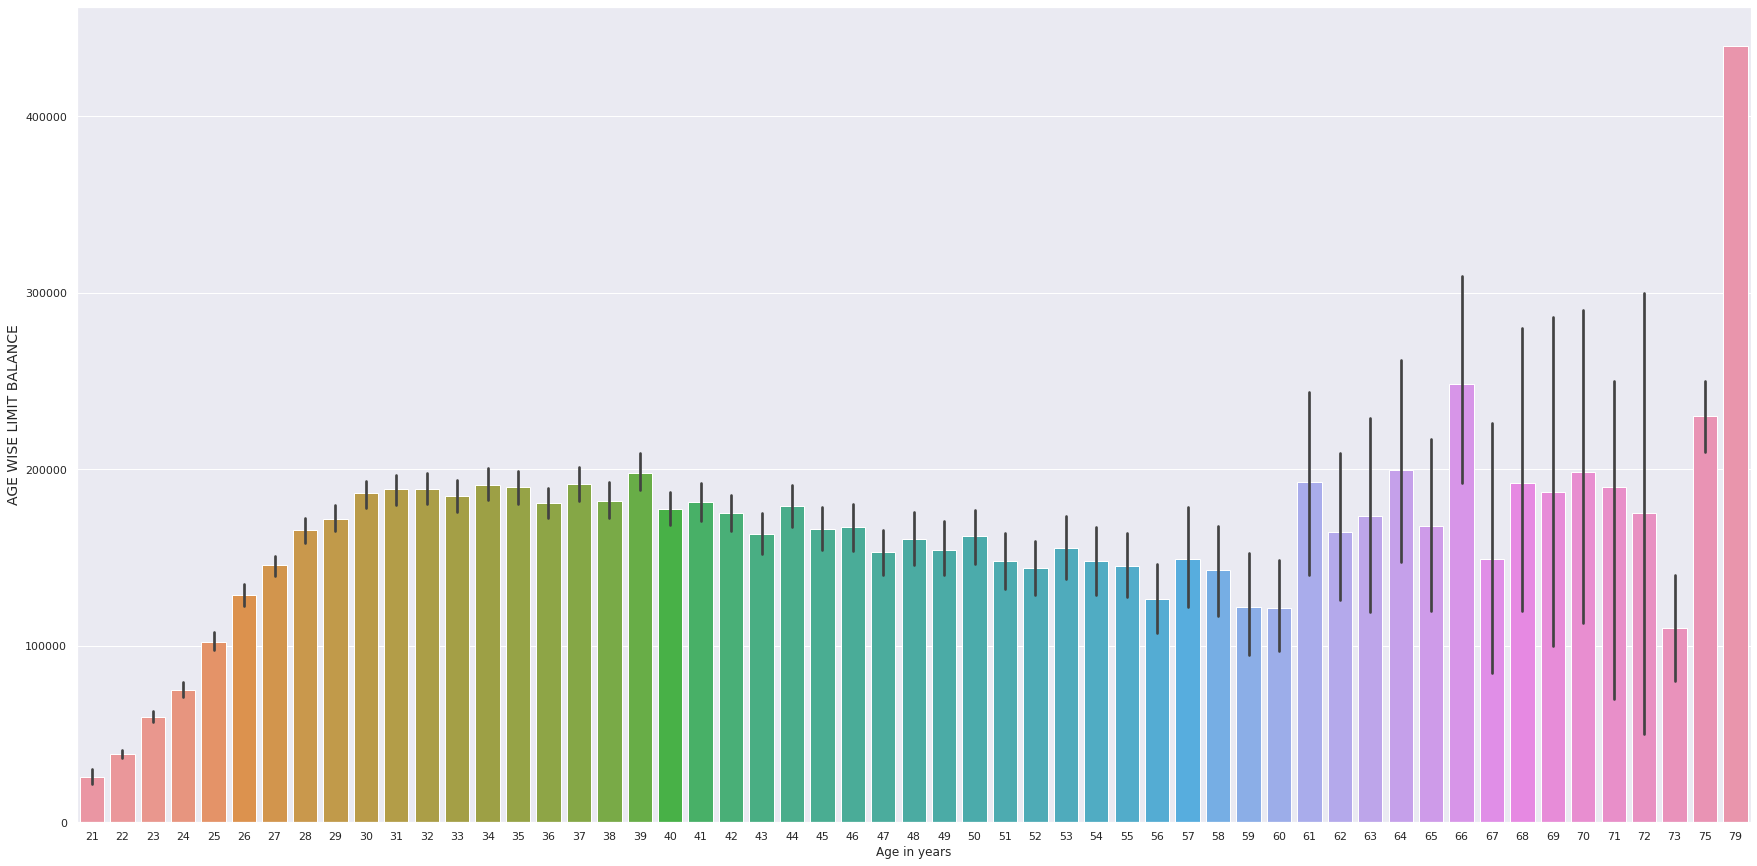

In [ ]:
plt.figure(figsize=(30,15))
sns.barplot(df['AGE'],df['LIMIT_BAL'])
plt.ylabel('AGE WISE LIMIT BALANCE',fontdict={'fontsize':14})
plt.xlabel('Age in years')

# Most peoples are in the age between 26 - 30 AGE
# Above AGE 60 mostly people are going to defaults 
# Above AGE 60 there is drastically increses in BILL_AMT AND PAY_AMT also
# upto AGE 32 LIMIT_BAL of peoples is showing is increasing and after AGE 32 drastically decreased in LIMIT_BAL and after AGE 60 LIMIT_BAL is showing more 

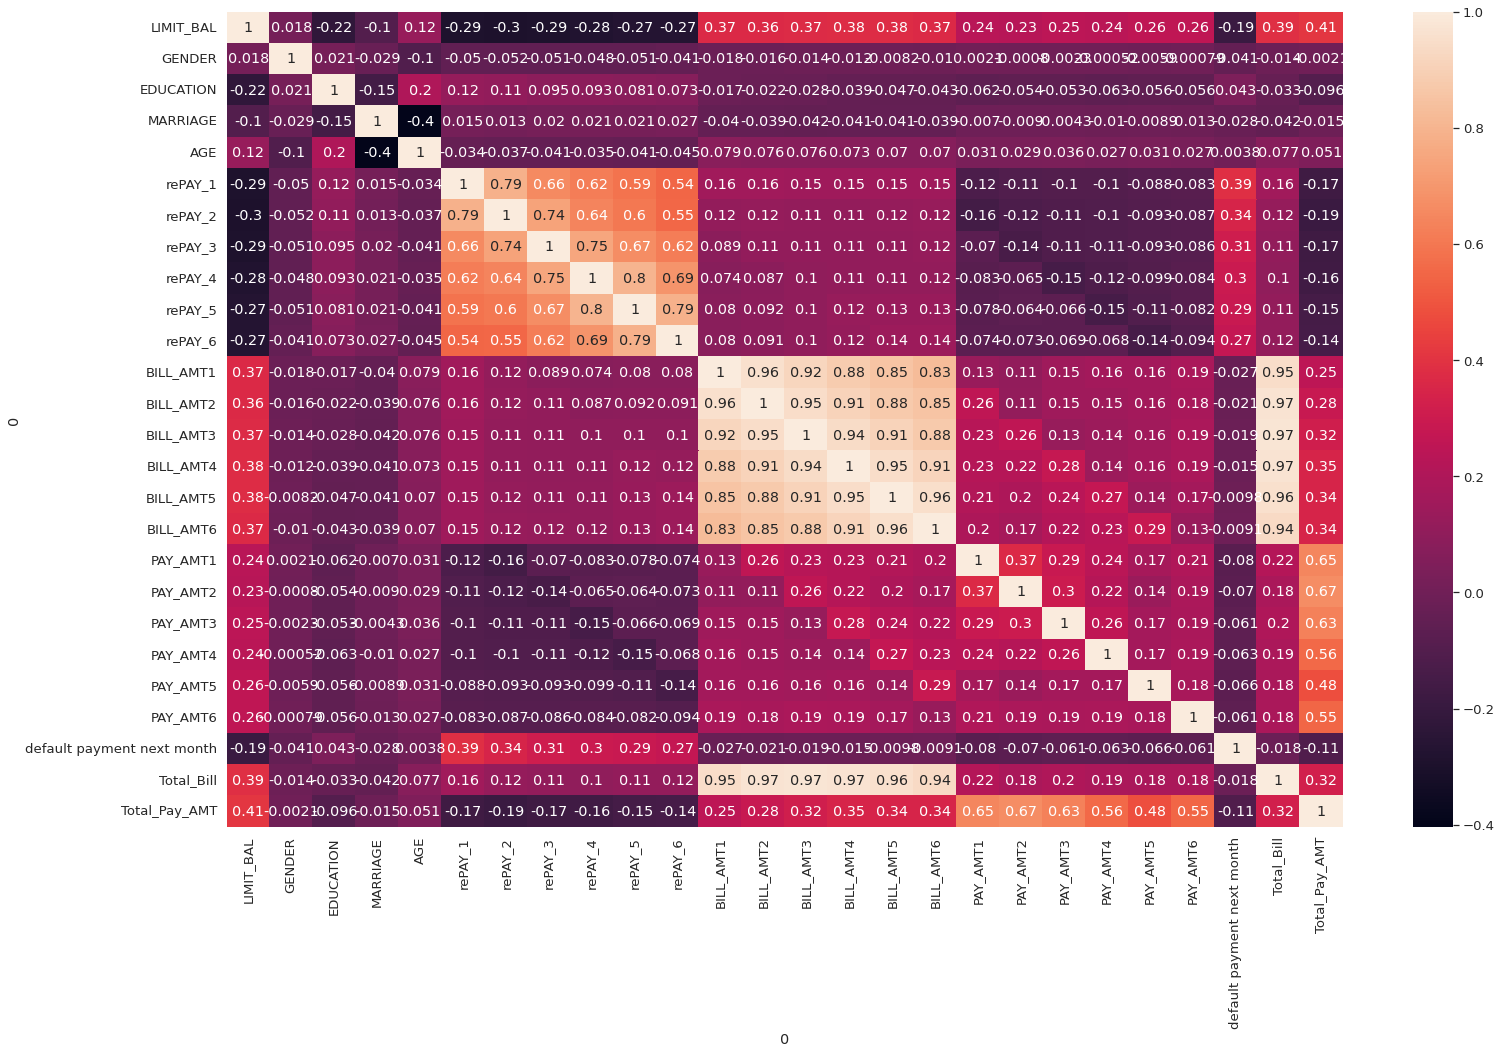

In [ ]:
# It creates Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

# ***Feature Engineering***

In [22]:
# Dropping the BILL_AMT and PAY_AMT features 
df_new = df.drop(['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 
                  'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1)

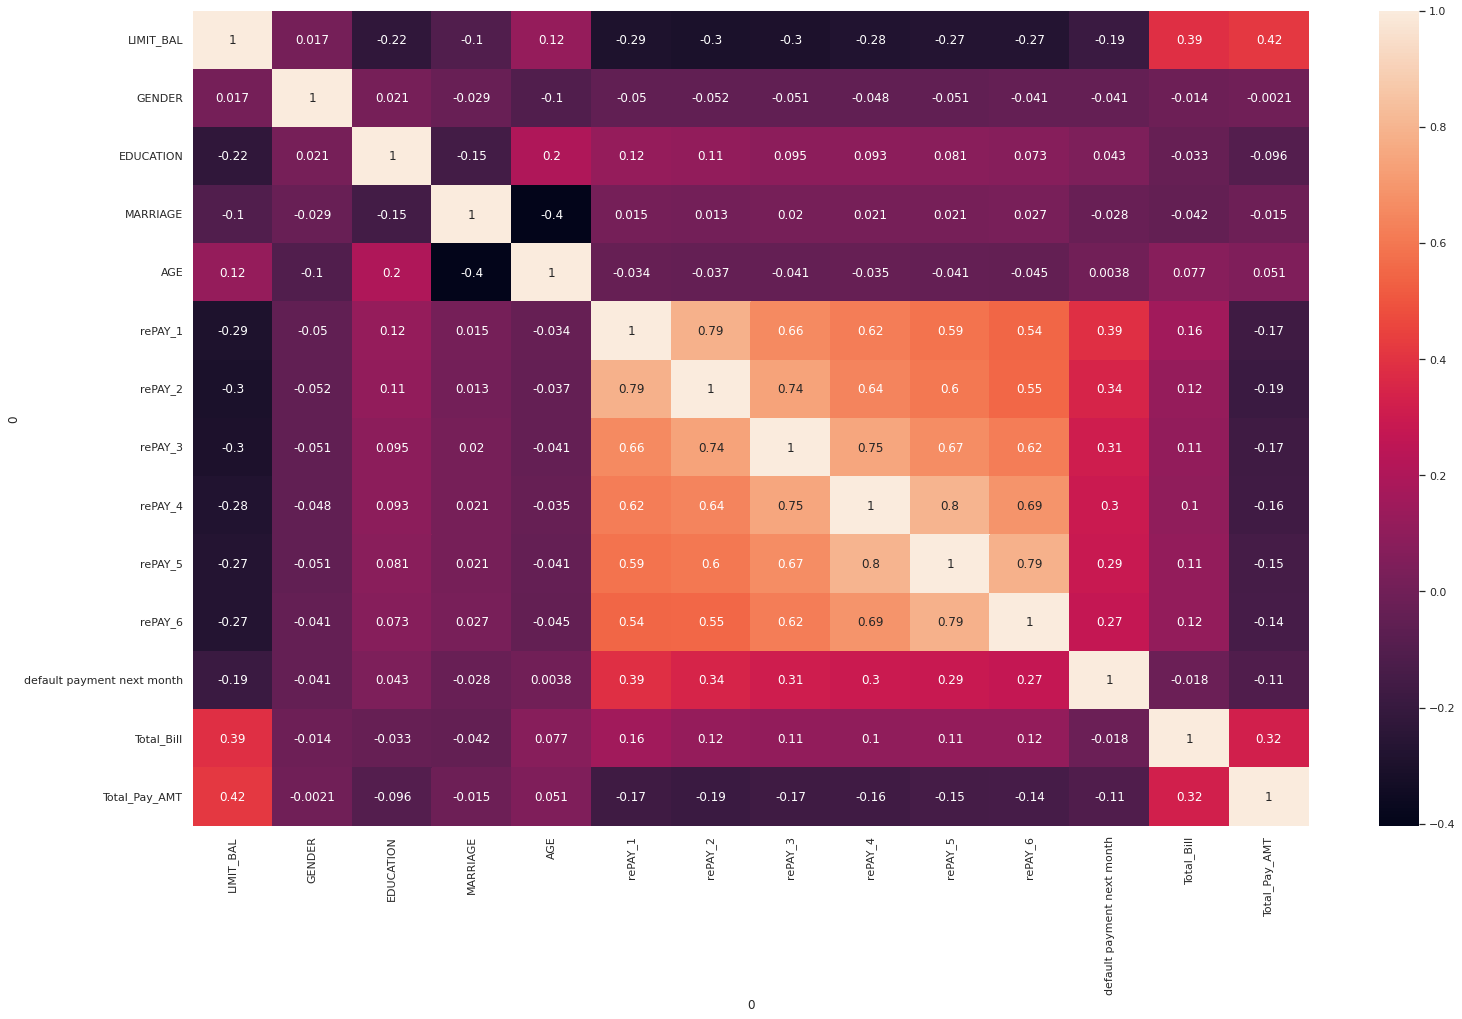

In [ ]:
# It creates Heatmap with new dataframe
plt.figure(figsize=(25,15))
sns.heatmap(df_new.corr(),annot=True)

# **One Hot Encoding**

# CATEGORICAL FEATURES

In [ ]:
df_new['GENDER'].unique()

array([2, 1])

In [ ]:
df_new['EDUCATION'].unique()#used in One Hot Encoding

array([2, 1, 3, 4])

In [ ]:
df_new['MARRIAGE'].unique()#used in One Hot Encoding

array([2, 1, 3])

In [23]:
# Encoding Education and Marriage since both are caategorical variables
df_new = pd.get_dummies(columns = ['EDUCATION','MARRIAGE'], data = df_new,drop_first=True)

In [24]:
df_new

,LIMIT_BAL,GENDER,AGE,rePAY_1,rePAY_2,rePAY_3,rePAY_4,rePAY_5,rePAY_6,default payment next month,Total_Bill,Total_Pay_AMT,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
2,120000,2,26,-1,2,0,0,0,2,1,17077,5000,1,0,0,1,0
3,90000,2,34,0,0,0,0,0,0,0,101653,11018,1,0,0,1,0
4,50000,2,37,0,0,0,0,0,0,0,231334,8388,1,0,0,0,0
5,50000,1,57,-1,0,-1,0,0,0,0,109339,59049,1,0,0,0,0
6,50000,1,37,0,0,0,0,0,0,0,238114,7772,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,100000,1,38,0,-1,-1,0,0,0,0,302568,124784,0,0,0,1,0
29995,80000,1,34,2,2,2,2,2,2,1,470933,21500,1,0,0,1,0
29996,220000,1,39,0,0,0,0,0,0,0,725349,42550,0,1,0,0,0
29998,30000,1,37,4,3,2,-1,0,0,1,70496,31300,1,0,0,1,0


# **Handling Imbalanced on target feature** 

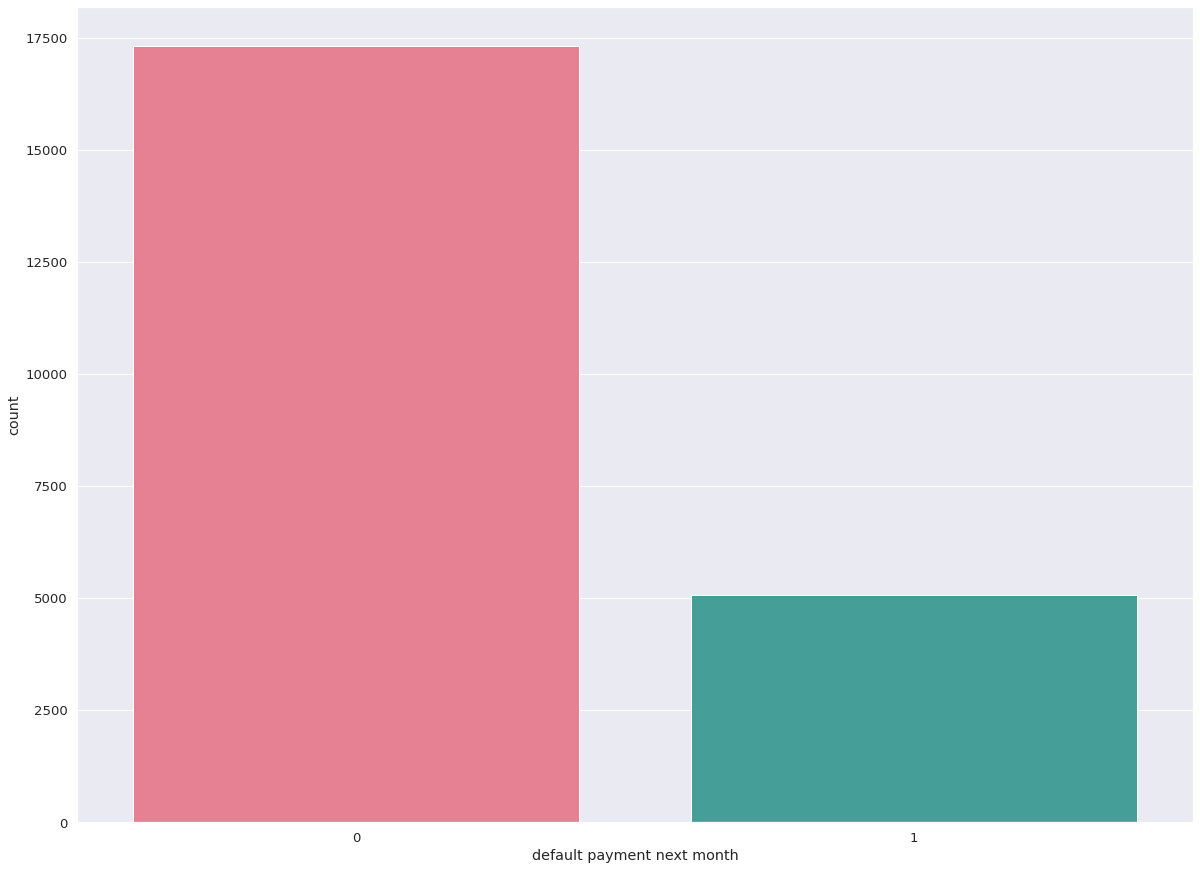

<Figure size 360x576 with 0 Axes>

In [ ]:
sns.countplot(df['default payment next month'], palette='husl')
plt.figure(figsize=(5,8))
plt.show()

In [25]:
# Split the dataset into dependent and independent variables.
x = df_new.drop('default payment next month',axis =1)
y = df_new['default payment next month']

In [26]:
# # Using Smote for handling data imbalance
smt = SMOTE()

In [27]:
X_sm, Y_sm = smt.fit_resample(x,y)

In [42]:
Y_sm.value_counts()

1    17318
0    17318
Name: default payment next month, dtype: int64

In [33]:
# set a list of columns for feature importance before standardization
columns = list(df_new.columns)

In [34]:
columns = x.columns

# **STANDARDIZATION OF DATA**

In [28]:
# Used Standard Scaler for scaling the datasets
std = StandardScaler()
x_scale = std.fit_transform(X_sm)

# **Training and Testing on Datasets**

In [29]:
# Train-Test Split for splitting the dataset into training and validation sets
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_scale,Y_sm,test_size=0.2,random_state=42,stratify = Y_sm)

# **Implementing Models**

In [30]:
# for metrics evaluation
from sklearn import metrics

In [31]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

# **Logistic Regression**

In [50]:
# Training Logistic Regression model
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [51]:
# Predicting using our trained Logistic regression model
y_pred_test = LR.predict(x_test)

In [52]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3575
           1       0.75      0.78      0.76      3353

    accuracy                           0.77      6928
   macro avg       0.77      0.77      0.77      6928
weighted avg       0.77      0.77      0.77      6928

[[2716  748]
 [ 859 2605]]


In [53]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of Logistic Regression model is: 76.80427251732101


In [54]:
print("recall score of Logistic Regression model is:",{recall_score(y_test, y_pred_test)})

recall score of Logistic Regression model is: {0.7520207852193995}


In [55]:
roc_auc_curve = roc_auc_score(y_pred_test,y_test)
print(f'roc_auc score of model LogisticRegression is : {roc_auc_curve}')

roc_auc score of model LogisticRegression is : 0.7683182370865044


# **Feature Importance**

In [ ]:
F_I = pd.DataFrame({'Features' : columns, 'Importance':np.abs(LR.coef_).ravel()})

In [ ]:
F_I = F_I.sort_values(by = 'Importance',ascending = False)[:10]

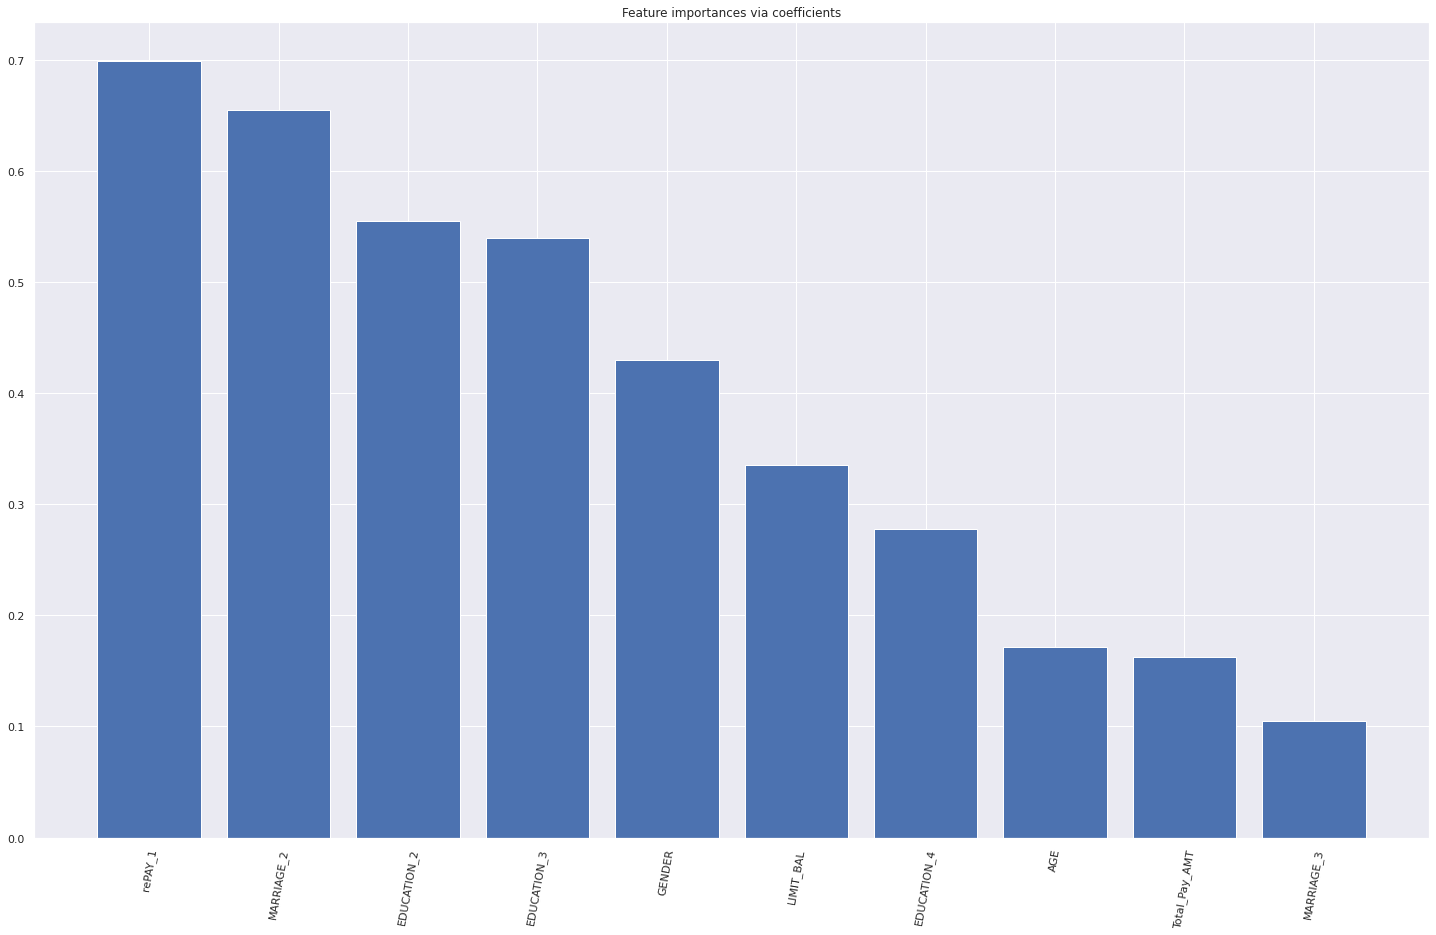

In [ ]:
plt.figure(figsize=(25,15))
plt.bar(height=F_I['Importance'], x= F_I['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

# **Support Vector Classifier**

In [56]:
# Training Support Vector Classifier Model
svc =SVC(random_state=42)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [57]:
y_pred_test = svc.predict(x_test)

In [58]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3667
           1       0.76      0.81      0.79      3261

    accuracy                           0.79      6928
   macro avg       0.79      0.80      0.79      6928
weighted avg       0.80      0.79      0.79      6928

[[2852  612]
 [ 815 2649]]


In [59]:
print("Accuracy of SVC model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of SVC model is: 79.40242494226328


In [60]:
print("recall score of SVC model is:",{recall_score(y_test, y_pred_test)})

recall score of SVC model is: {0.7647228637413395}


In [61]:
roc_auc_curve = roc_auc_score(y_pred_test,y_test)
print(f'roc_auc score of model SVC is : {roc_auc_curve}')

roc_auc score of model SVC is : 0.7950374922008846


# **Random Forest Classifier**

In [69]:
# Training Random Forest Classifier Model
RFC = RandomForestClassifier(n_estimators = 200,random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [70]:
# Predicting using our trained model
y_pred_test = RFC.predict(x_test)

In [71]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      3537
           1       0.83      0.85      0.84      3391

    accuracy                           0.84      6928
   macro avg       0.84      0.84      0.84      6928
weighted avg       0.84      0.84      0.84      6928

[[2954  510]
 [ 583 2881]]


In [72]:
print("Accuracy of RandomForestClassifier model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of RandomForestClassifier model is: 84.22344110854503


In [73]:
print("recall score of RFC model is:",{recall_score(y_test, y_pred_test)})

recall score of RFC model is: {0.8316974595842956}


In [74]:
roc_auc_curve = roc_auc_score(y_pred_test,y_test)
print(f'roc_auc score of model RFC is : {roc_auc_curve}')

roc_auc score of model RFC is : 0.8423864681301858


# Feature_Importance

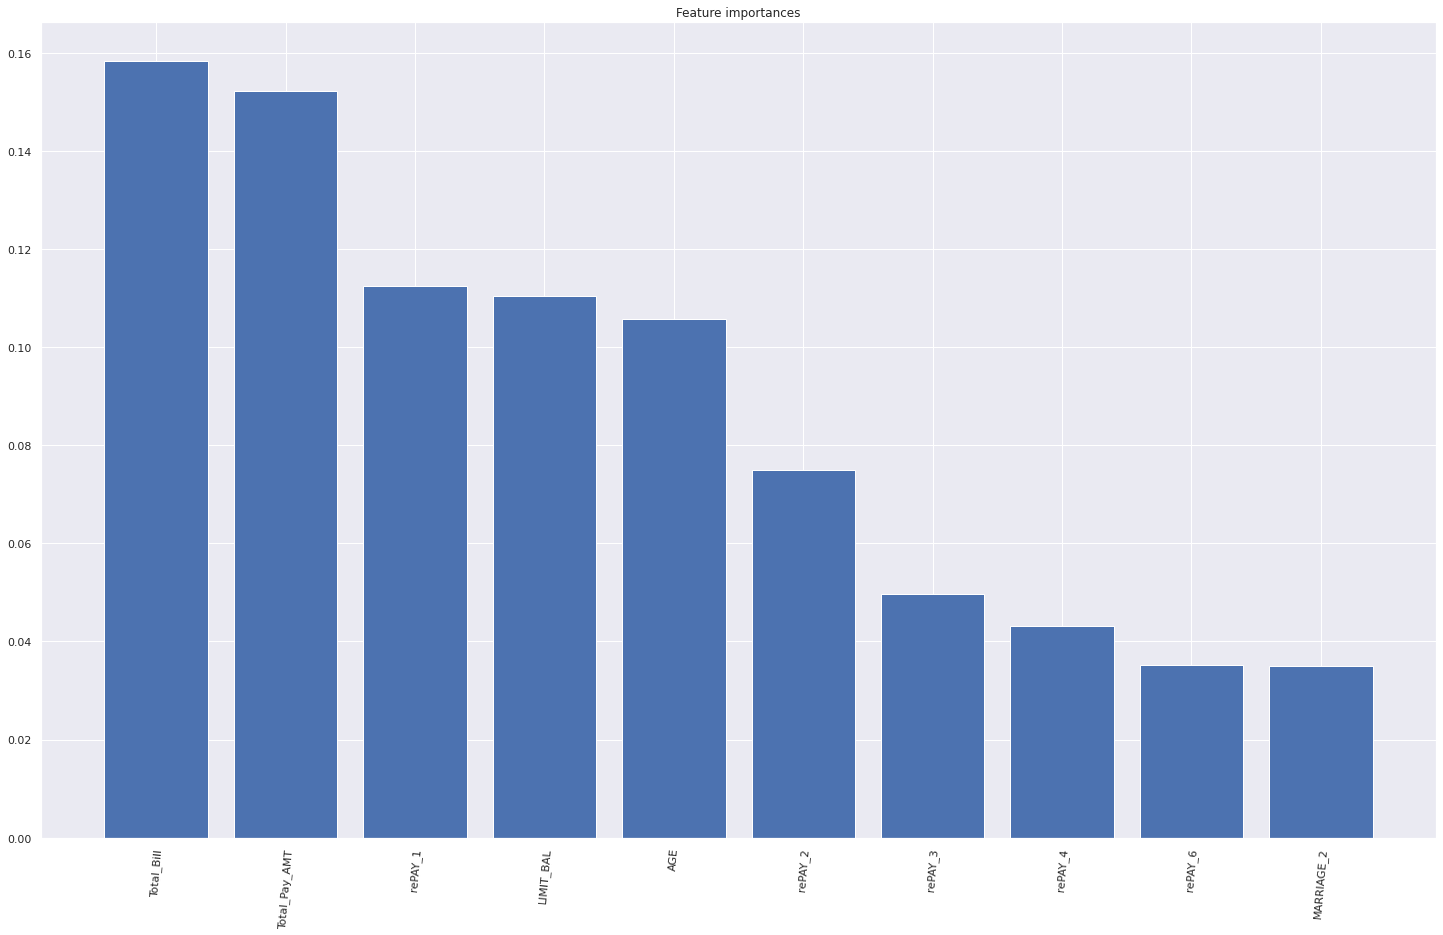

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(RFC.feature_importances_,index = columns,columns=['importance_rf']).sort_values('importance_rf',ascending=False)[:10]
                                    
plt.subplots(figsize=(25,15))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

# **XGBoost Classifier**

In [75]:
# Training Model
xgb_clf=xgb.XGBClassifier(max_depth=5,learning_rate=0.3,n_jobs=-1,random_state=42)
xgb_clf.fit(x_train,y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_jobs=-1, random_state=42)

In [76]:
# Predicting using our trained model
y_pred_test = xgb_clf.predict(x_test)

In [77]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3723
           1       0.79      0.85      0.82      3205

    accuracy                           0.83      6928
   macro avg       0.83      0.83      0.83      6928
weighted avg       0.83      0.83      0.83      6928

[[2992  472]
 [ 731 2733]]


In [78]:
print("Accuracy of XGBClassifier model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of XGBClassifier model is: 82.63568129330254


In [79]:
print("recall score of XGBClassifier model is:",{recall_score(y_test, y_pred_test)})

recall score of XGBClassifier model is: {0.788972286374134}


In [80]:
roc_auc_curve = roc_auc_score(y_pred_test,y_test)
print(f'roc_auc score of model XGBClassifier is : {roc_auc_curve}')

roc_auc score of model XGBClassifier is : 0.8281915386204488


# **Feature Importance**

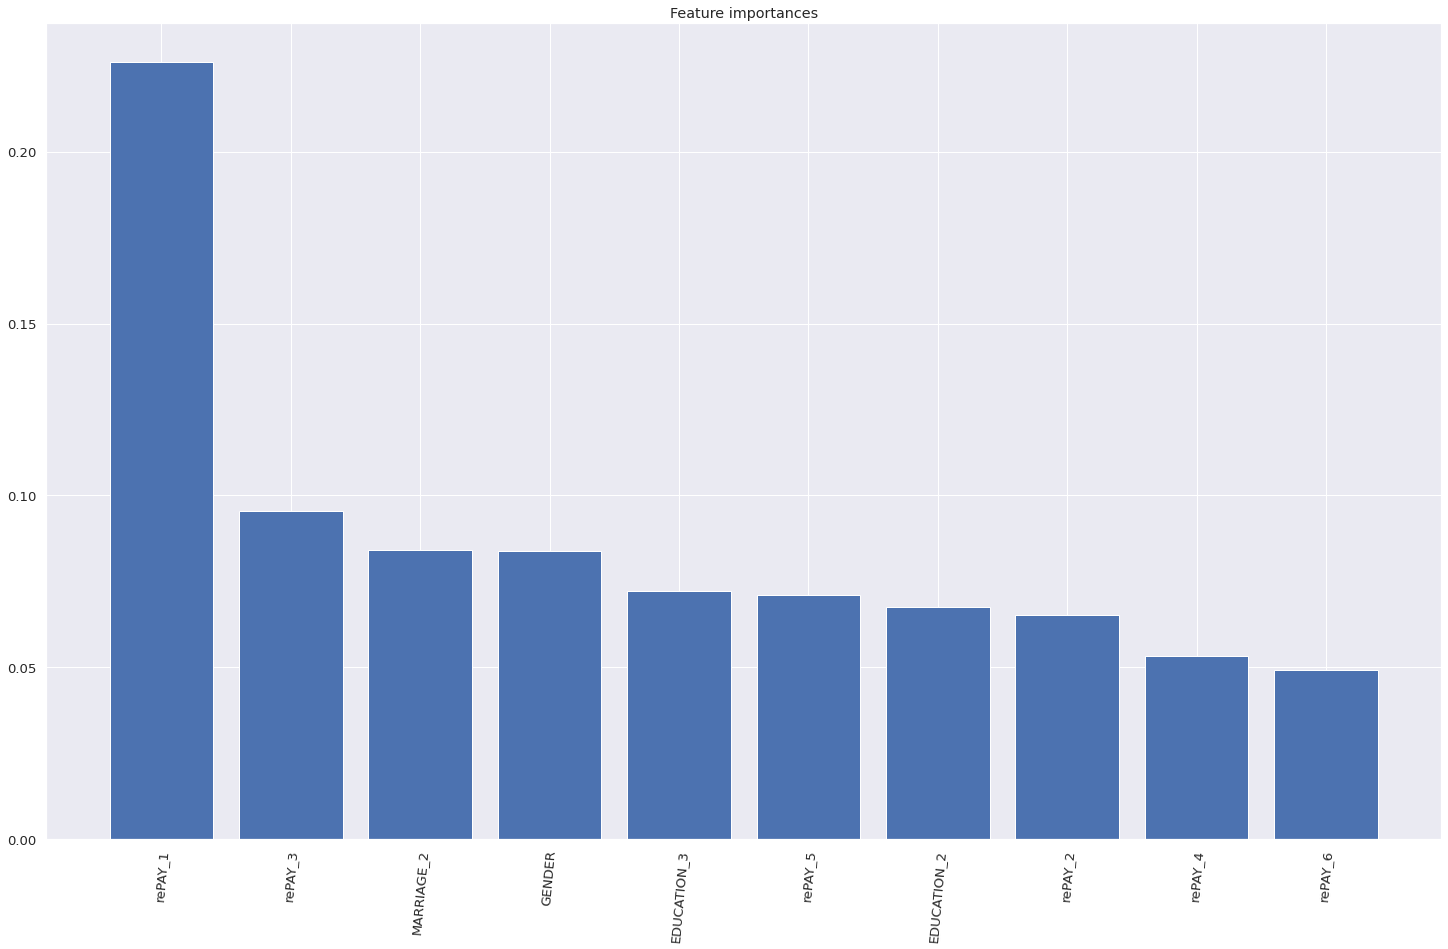

In [81]:
feature_importances_xgb = pd.DataFrame(xgb_clf.feature_importances_,index = columns,columns=['importance_xgb']).sort_values('importance_xgb',ascending=False)[:10]
                                    
plt.subplots(figsize=(25,15))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

# **K-Neighbours**

In [93]:
# fitting data into algo
knn = KNeighborsClassifier(n_neighbors=7)

In [94]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [96]:
y_pred_test = knn.predict(x_test)

In [97]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      3553
           1       0.77      0.79      0.78      3375

    accuracy                           0.79      6928
   macro avg       0.79      0.79      0.79      6928
weighted avg       0.79      0.79      0.79      6928

[[2767  697]
 [ 786 2678]]


In [98]:
print("Accuracy of KNeighborsClassifier model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of KNeighborsClassifier model is: 78.59411085450347


In [100]:
print("recall score of KNeighborsClassifier model is:",{recall_score(y_test, y_pred_test)})

recall score of KNeighborsClassifier model is: {0.773094688221709}


In [99]:
roc_auc_curve = roc_auc_score(y_pred_test,y_test)
print(f'roc_auc score of model KNeighborsClassifier is : {roc_auc_curve}')

roc_auc score of model KNeighborsClassifier is : 0.7861299892631162


In [ ]:
#  KNN does not provide a prediction for the importance or coefficients of variables

# **DecisionTreeClassifier**

In [67]:
# training data
DTC = DecisionTreeClassifier(max_depth=10, random_state=14) 

In [68]:
# training the classifier
DTC.fit(x_train, y_train.ravel())

DecisionTreeClassifier(max_depth=10, random_state=14)

In [69]:
# # Predicting using our trained model
y_pred_test = DTC.predict(x_test)

In [70]:
print(classification_report(y_pred_test, y_test))
print(confusion_matrix( y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      3744
           1       0.74      0.81      0.78      3184

    accuracy                           0.78      6928
   macro avg       0.78      0.79      0.78      6928
weighted avg       0.79      0.78      0.78      6928

[[2858  606]
 [ 886 2578]]


In [71]:
print("Accuracy of DecisionTreeClassifier model is:",
metrics.accuracy_score(y_test, y_pred_test)*100)

Accuracy of DecisionTreeClassifier model is: 78.46420323325634


In [72]:
print("recall score of DecisionTreeClassifier model is:",{recall_score(y_test, y_pred_test)})

recall score of DecisionTreeClassifier model is: {0.7442263279445728}


In [73]:
roc_auc_curve = roc_auc_score(y_pred_test,y_test)
print(f'roc_auc score of model DecisionTreeClassifier is : {roc_auc_curve}')

roc_auc score of model DecisionTreeClassifier is : 0.7865140338444359


# **Feature Importance**

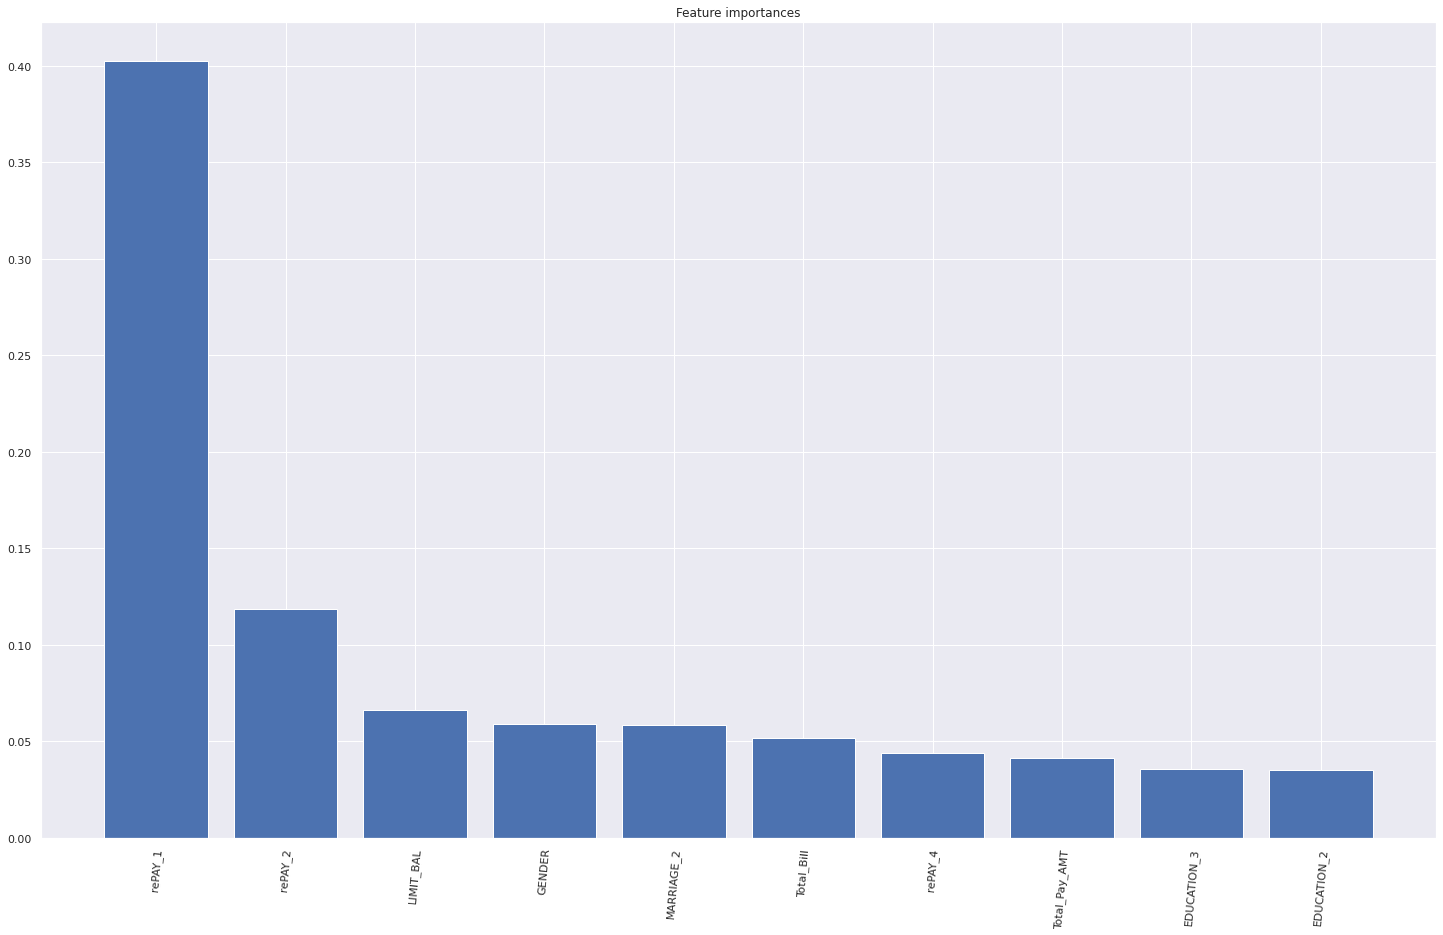

In [74]:
feature_importances_DTC = pd.DataFrame(DTC.feature_importances_,index = columns,columns=['importance_DTC']).sort_values('importance_DTC',ascending=False)[:10]
                                    
plt.subplots(figsize=(25,15))
plt.title("Feature importances")
plt.bar(feature_importances_DTC.index, feature_importances_DTC['importance_DTC'],
        color="b",  align="center")
plt.xticks(feature_importances_DTC.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

# HYPERPARAMETER TUNING 

# **LogisticRegression**

In [82]:
LR_GCV = LogisticRegression()

In [83]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','saga'],
    'max_iter' : [100, 500,1500]
    }
]

In [84]:
clf = GridSearchCV(LR_GCV, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [85]:
clf.fit(x_train,y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 500, 1500],
                          'penalty': ['l1', 'l2', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear',
                                     'saga']}],
             verbose=True)

In [86]:
clf.best_estimator_

LogisticRegression(C=0.004832930238571752, penalty='l1', solver='liblinear')

In [87]:
# Predicting Using GridSearchCV
y_pred = clf.predict(x_test)

In [88]:
print(classification_report(y_pred, y_test))
print(confusion_matrix( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      3609
           1       0.75      0.78      0.76      3319

    accuracy                           0.77      6928
   macro avg       0.77      0.77      0.77      6928
weighted avg       0.77      0.77      0.77      6928

[[2726  883]
 [ 738 2581]]


In [89]:
print("Accuracy of LogisticRegression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of LogisticRegression model is: 76.60219399538106


In [90]:
print("recall_score of LogisticRegression model is:",{recall_score(y_test, y_pred)})

recall_score of LogisticRegression model is: {0.7450923787528868}


In [91]:
roc_auc_GCV=roc_auc_score(y_pred,y_test)
print(f'roc_auc score of model LogisticRegression is : {roc_auc_GCV}')

roc_auc score of model LogisticRegression is : 0.7664888780692973


# Feature importances

In [ ]:
model=clf.best_estimator_

In [ ]:
importance=model.coef_[0]

In [ ]:
F_I = pd.DataFrame({'Features' : columns, 'Importance':importance.ravel()})

In [ ]:
F_I = F_I.sort_values(by = 'Importance',ascending = False)[:10]

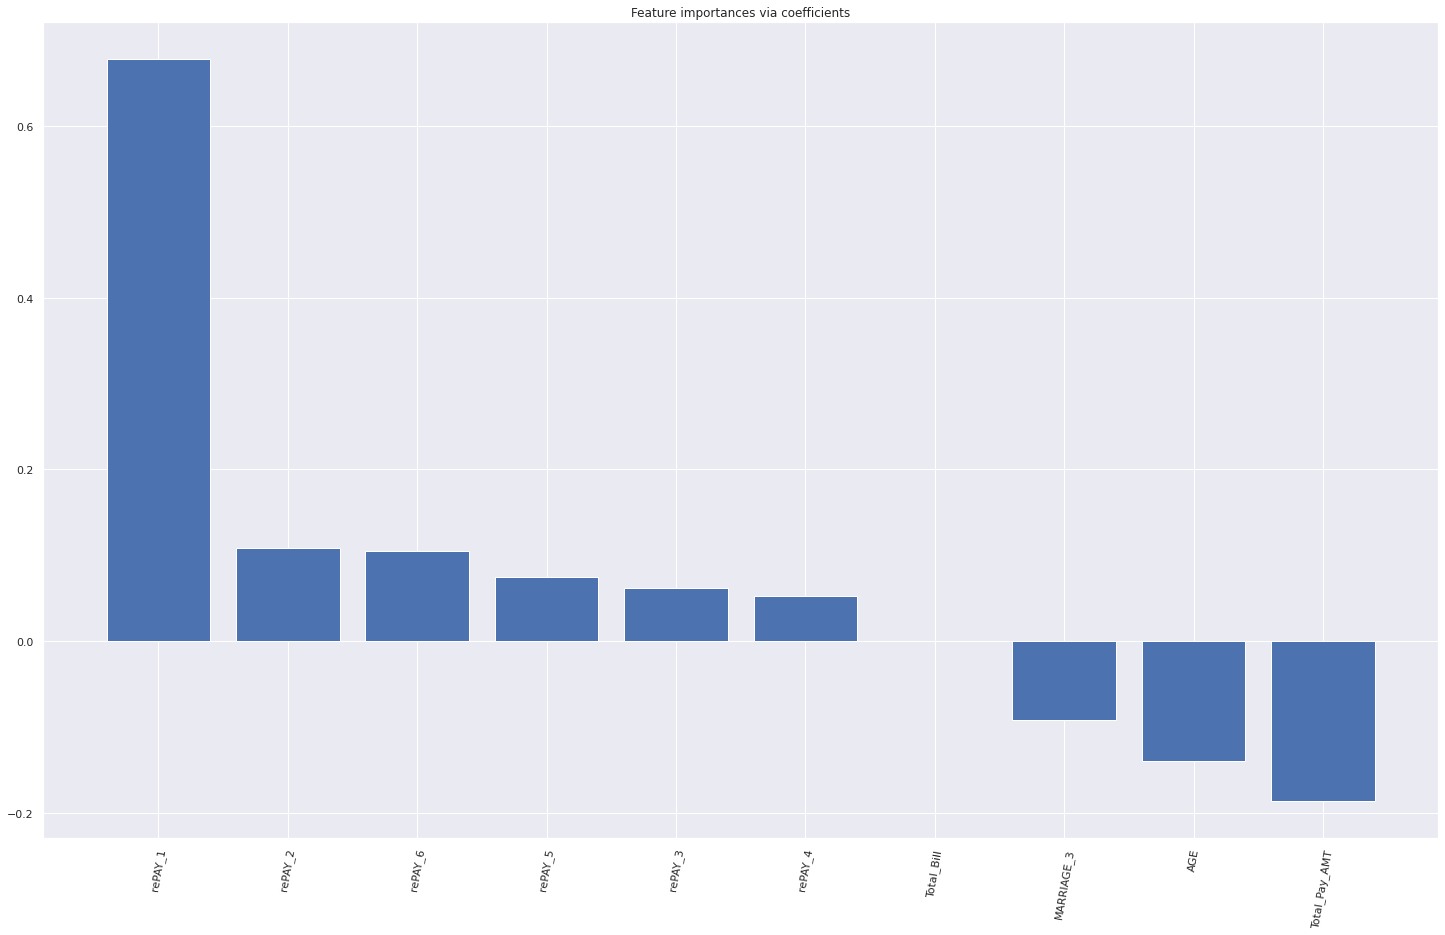

In [ ]:
plt.figure(figsize=(25,15))
plt.bar(height=F_I['Importance'], x= F_I['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

# **Support Vector Classifier**

In [62]:
SVC_GCV = SVC(random_state=24)

In [63]:
param_grid = {'C' : np.logspace(-4, 4, 10),'kernel' : ['rbf']}

In [64]:
clf = GridSearchCV(SVC_GCV, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [65]:
clf.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=SVC(random_state=24), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'kernel': ['rbf']},
             verbose=True)

In [66]:
clf.best_estimator_

SVC(C=21.54434690031882, random_state=24)

In [67]:
# Predicting Using GridSearchCV
y_pred = clf.predict(x_test)

In [68]:
print(classification_report(y_pred, y_test))
print(confusion_matrix( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      3741
           1       0.76      0.82      0.79      3187

    accuracy                           0.80      6928
   macro avg       0.80      0.80      0.80      6928
weighted avg       0.80      0.80      0.80      6928

[[2899  842]
 [ 565 2622]]


In [69]:
print("recall_score of Support Vector Classifier model is:",{recall_score(y_test, y_pred)})

recall_score of Support Vector Classifier model is: {0.7569284064665127}


In [70]:
print("Accuracy of Support Vector Classifier model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Support Vector Classifier model is: 79.69110854503464


In [71]:
roc_auc_GCV=roc_auc_score(y_pred,y_test)
print(f'roc_auc score of model Support Vector Classifier is : {roc_auc_GCV}')

roc_auc score of model Support Vector Classifier is : 0.7988218896148791


In [ ]:
# Feature Importance is not possible for non-linear kernel.

# Random Forest Classifier

In [51]:
# Defining object for GridSearchCV
RFC_GCV = RandomForestClassifier(random_state=42)

In [52]:
# Initializing paramter grid for GridSearchCV
param_grid = {'n_estimators':[100,200,300],'max_features' : ["sqrt", "log2"],'min_samples_leaf': [1, 3, 5,7], 'min_samples_split': [3, 4, 5, 7]}

# Using GridSearchCV that optimizes scoring parameter precision score
clf=GridSearchCV(RFC_GCV,param_grid =param_grid,n_jobs=-1,verbose=5)

# Fitting data to our GridSearchCV object 
clf.fit(x_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [3, 4, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=5)

In [53]:
clf.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_split=3,
                       n_estimators=300, random_state=42)

In [54]:
# Predicting Using GridSearchCV
y_pred = clf.predict(x_test)

In [55]:
print(classification_report(y_pred, y_test))
print(confusion_matrix( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      3567
           1       0.83      0.85      0.84      3361

    accuracy                           0.84      6928
   macro avg       0.84      0.84      0.84      6928
weighted avg       0.84      0.84      0.84      6928

[[2962  605]
 [ 502 2859]]


In [56]:
print("Accuracy of RandomForestClassifier model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of RandomForestClassifier model is: 84.02136258660508


In [57]:
print("recall_score of RandomForestClassifier model is:",{recall_score(y_test, y_pred)})

recall_score of RandomForestClassifier model is: {0.8253464203233256}


In [58]:
roc_auc_GCV=roc_auc_score(y_pred,y_test)
print(f'roc_auc score of model RandomForestClassifier is : {roc_auc_GCV}')

roc_auc score of model RandomForestClassifier is : 0.84051468688773


# FEATURE IMPORTANCE

In [59]:
model=clf.best_estimator_

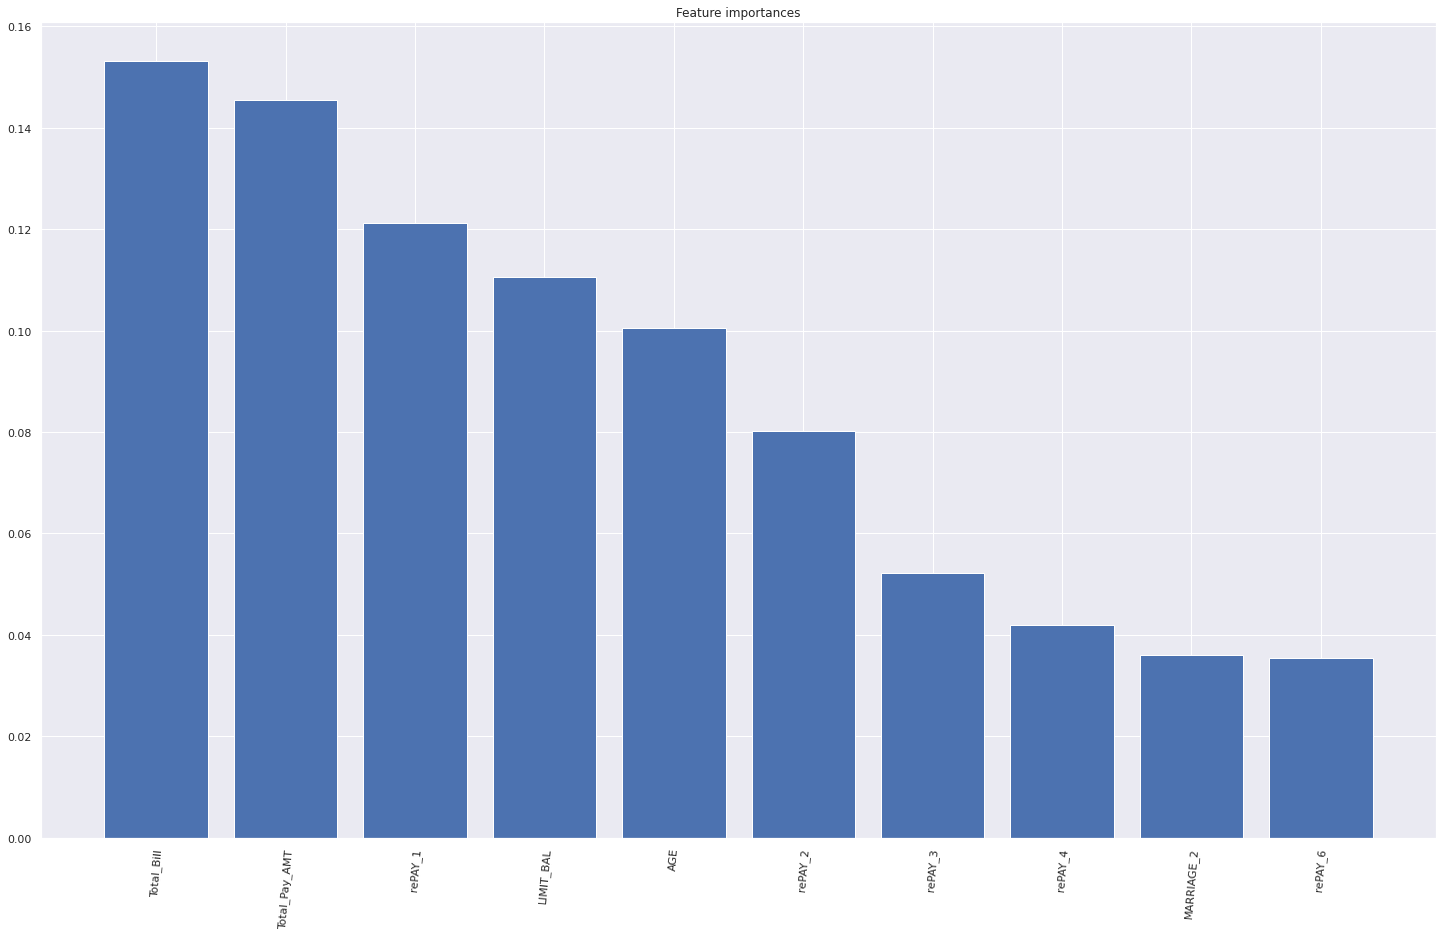

In [61]:
# Feature Importance
feature_importances_rf = pd.DataFrame(model.feature_importances_,index = columns,columns=['importance_rf']).sort_values('importance_rf',ascending=False)[:10]
                                    
plt.subplots(figsize=(25,15))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

# **XGBoost**

In [37]:
XGB_GCV = xgb.XGBClassifier(random_state=42)

In [38]:
# Training Model
param_grid = {'n_estimators':[100,200,300],'kernel' : ['linear', 'poly', 'rbf']}

clf=GridSearchCV(XGB_GCV,param_grid =param_grid,n_jobs=-1,verbose=5)

clf.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'kernel': ['linear', 'poly', 'rbf'],
                         'n_estimators': [100, 200, 300]},
             verbose=5)

In [39]:
clf.best_estimator_

XGBClassifier(kernel='linear', n_estimators=300, random_state=42)

In [40]:
# Predicting Using GridSearchCV
y_pred = clf.predict(x_test)

In [41]:
print(classification_report(y_pred, y_test))
print(confusion_matrix( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3748
           1       0.77      0.84      0.81      3180

    accuracy                           0.81      6928
   macro avg       0.81      0.82      0.81      6928
weighted avg       0.82      0.81      0.81      6928

[[2962  786]
 [ 502 2678]]


In [42]:
print("recall_score of XGBClassifier model is:",{recall_score(y_test, y_pred)})

recall_score of XGBClassifier model is: {0.773094688221709}


In [47]:
print("Accuracy of XGBClassifier model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of XGBClassifier model is: 81.40877598152426


In [45]:
roc_auc_GCV=roc_auc_score(y_pred,y_test)
print(f'roc_auc score of model XGBClassifier is : {roc_auc_GCV}')

roc_auc score of model XGBClassifier is : 0.8162132592309189


# FEATURE IMPORTANCE

In [49]:
model=clf.best_estimator_

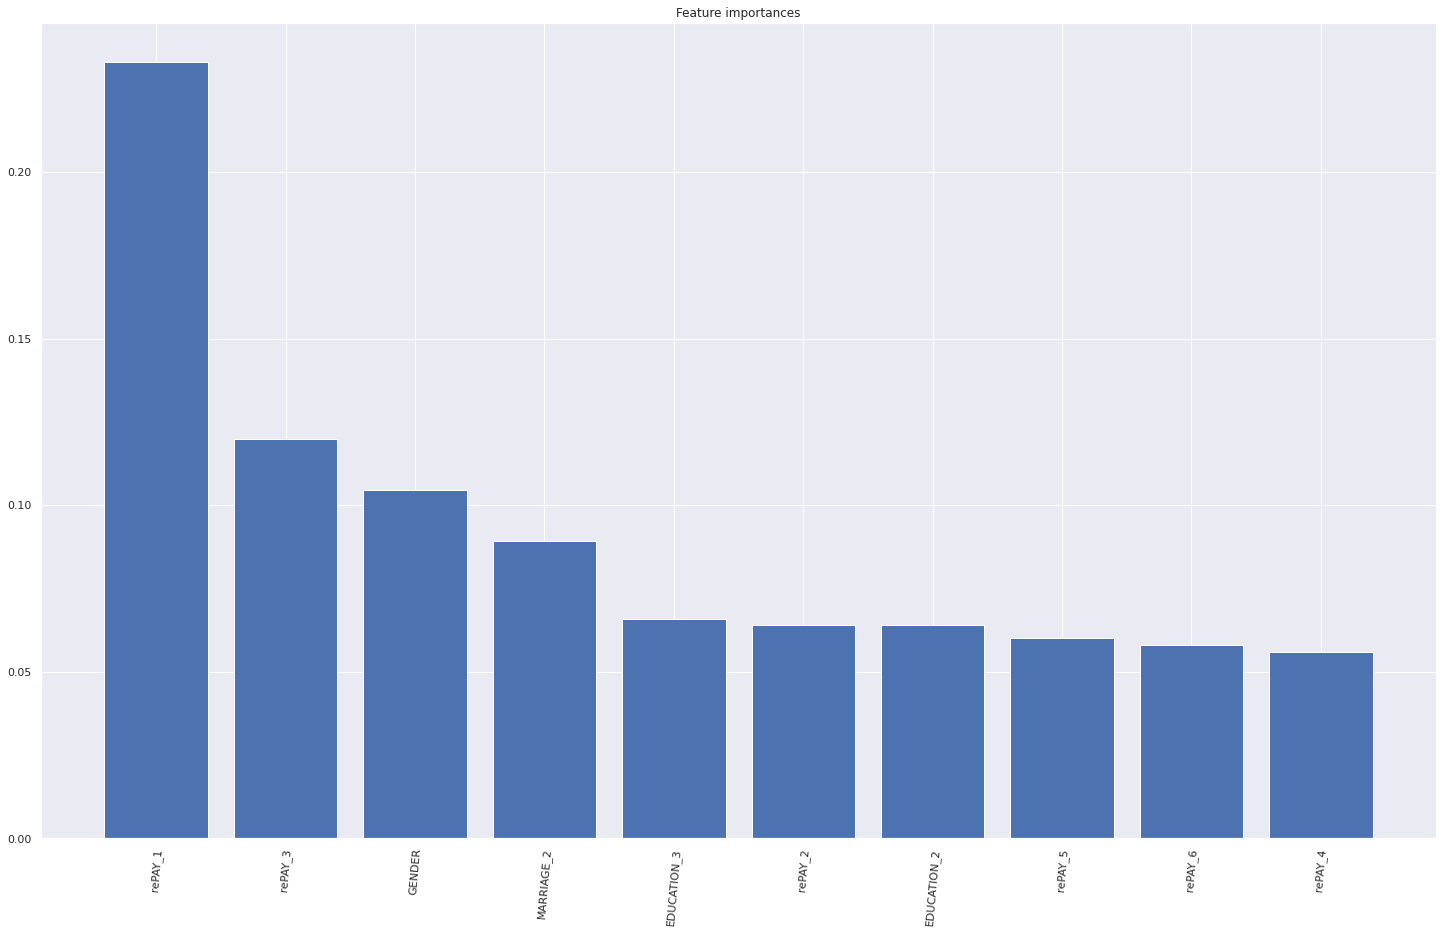

In [50]:
# Feature Importance
feature_importances_XGB_GCV = pd.DataFrame(model.feature_importances_,index = columns,columns=['importance_XGB_GCV']).sort_values('importance_XGB_GCV',ascending=False)[:10]
                                    
plt.subplots(figsize=(25,15))
plt.title("Feature importances")
plt.bar(feature_importances_XGB_GCV.index, feature_importances_XGB_GCV['importance_XGB_GCV'],color="b",  align="center")
plt.xticks(feature_importances_XGB_GCV.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

# **KNN**

In [44]:
# fitting data into algo
knn_GCV = KNeighborsClassifier()

In [58]:
# Training Model
param_grid = {'n_neighbors':[10,13,15],'weights' : ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree']}

clf=GridSearchCV(knn_GCV,param_grid =param_grid,n_jobs=-1,verbose = 1, cv=3)

In [59]:
clf.fit(x_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [10, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [60]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [61]:
# Predicting Using GridSearchCV
y_pred = clf.predict(x_test)

In [62]:
print(classification_report(y_pred, y_test))
print(confusion_matrix( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3593
           1       0.78      0.81      0.79      3335

    accuracy                           0.80      6928
   macro avg       0.80      0.80      0.80      6928
weighted avg       0.80      0.80      0.80      6928

[[2830  763]
 [ 634 2701]]


In [63]:
print("recall_score of knn_GCV model is:",{recall_score(y_test, y_pred)})

recall_score of knn_GCV model is: {0.7797344110854504}


In [64]:
print("Accuracy of knn_GCV model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of knn_GCV model is: 79.83545034642032


In [65]:
roc_auc_GCV=roc_auc_score(y_pred,y_test)
print(f'roc_auc score of model knn_GCV is : {roc_auc_GCV}')

roc_auc score of model knn_GCV is : 0.7987688454687213


# **DecisionTreeClassifier**

In [32]:
DTC_GCV = DecisionTreeClassifier(max_depth=10, random_state=42) 

In [33]:
# Training Model
param_grid = {'criterion':['gini','entropy'],'min_samples_leaf': [1, 3, 5,7], 'min_samples_split': [3, 4, 5, 7]}

clf=GridSearchCV(DTC_GCV,param_grid =param_grid,n_jobs=-1,verbose = 1, cv=3)

In [34]:
clf.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [3, 4, 5, 7]},
             verbose=1)

In [35]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=4,
                       random_state=42)

In [36]:
y_pred = clf.predict(x_test)

In [37]:
print(classification_report(y_pred, y_test))
print(confusion_matrix( y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      3818
           1       0.73      0.82      0.77      3110

    accuracy                           0.78      6928
   macro avg       0.78      0.79      0.78      6928
weighted avg       0.79      0.78      0.78      6928

[[2889  929]
 [ 575 2535]]


In [38]:
print("recall_score of DecisionTreeClassifier model is:",{recall_score(y_test, y_pred)})

recall_score of DecisionTreeClassifier model is: {0.7318129330254042}


In [39]:
print("Accuracy of DecisionTreeClassifier model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of DecisionTreeClassifier model is: 78.29099307159353


In [40]:
roc_auc_GCV=roc_auc_score(y_pred,y_test)
print(f'roc_auc score of model DecisionTreeClassifier is : {roc_auc_GCV}')

roc_auc score of model DecisionTreeClassifier is : 0.7858957148319266


# **Feature Importance**

In [89]:
model=clf.best_estimator_

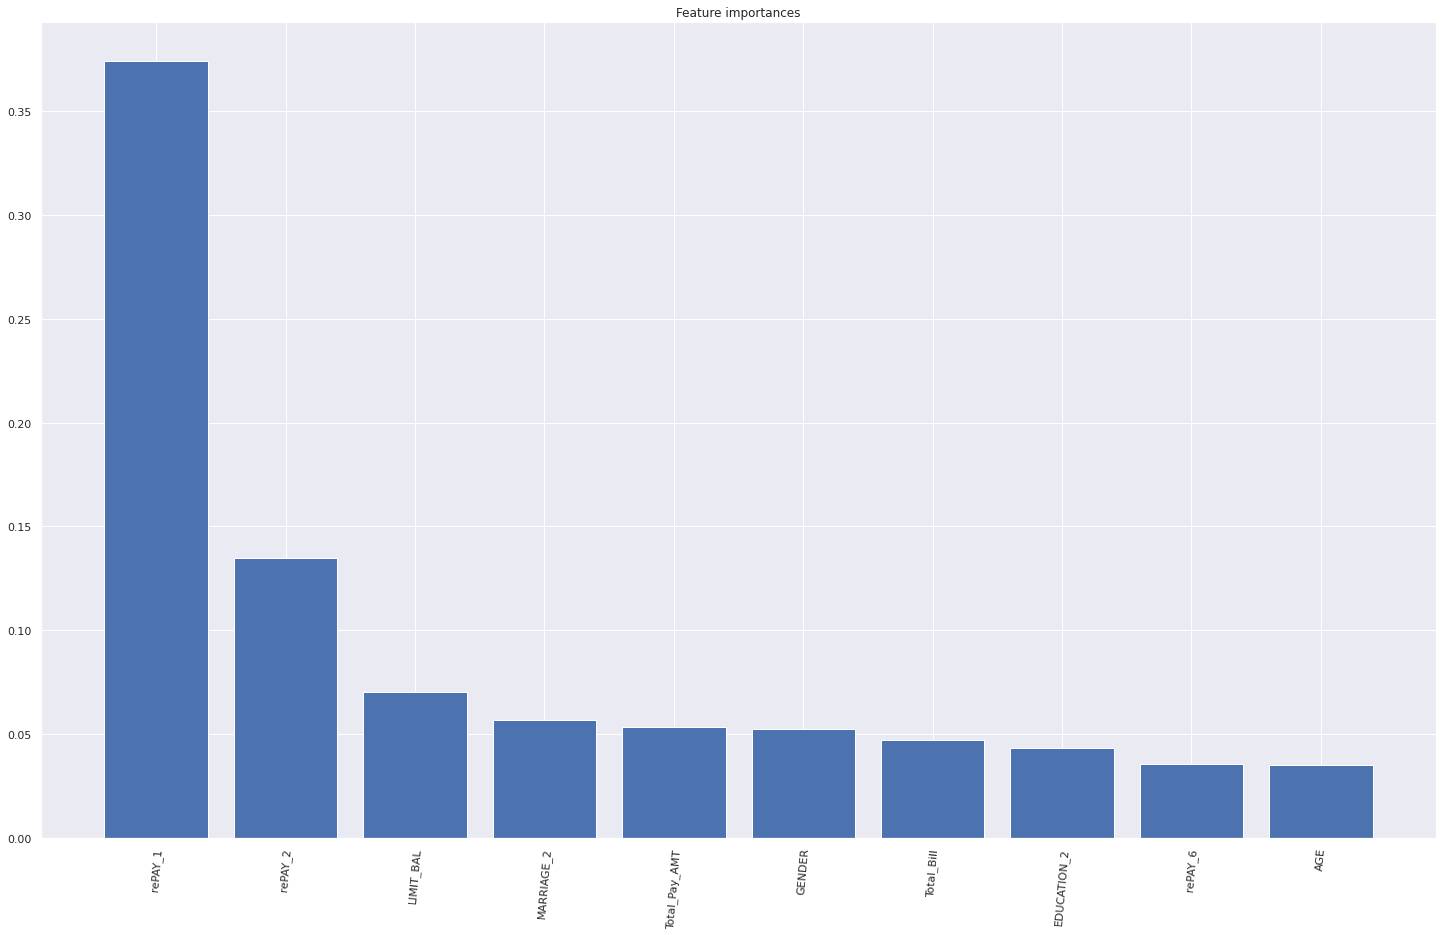

In [90]:
feature_importances_DTC_GCV = pd.DataFrame(model.feature_importances_,index = columns,columns=['importance_DTC_GCV']).sort_values('importance_DTC_GCV',ascending=False)[:10]
                                    
plt.subplots(figsize=(25,15))
plt.title("Feature importances")
plt.bar(feature_importances_DTC_GCV.index, feature_importances_DTC_GCV['importance_DTC_GCV'],
        color="b",  align="center")
plt.xticks(feature_importances_DTC_GCV.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

# **Conclusion**

# **Insights from EDA**
# We can see that there are almost 77% of Non Defaulters and 23% are Only     Defaulters
# Increase of LIMIT_BAL deafaulters are also decreases
# Reason of getting defaulters is only due to delaying payments 
# Most of the defaulters are university students 
# Also mostly females are going to be default next month but if we see males are also going to be default as near as females although having less credit card users
# I can say that married people had generated more bills than singles and others

# **Model Performance**

# In our dataset, We used many algorithm like Logistic Regression,Support vector classsifier,decision tree classifier,XGBoost Classifier,Random Forest Classifier,K Nearest Neighbours.
# Random Forest was the best performing algorithm as shown below

# Random Forest Classifier has the best value with
# accuracy score of 84.02% 
# recall score of 83%
# precision score of 86%
# f1 score of 84%


# Total_BILL and Total_pay_AMT are the most important features for our Random Forest Classifier best performing model